# Problem Statement
---
## Business Objective
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.  The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Problem Objective
Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
Some of the salient feature to keep in mind for the problem are:
- Churn prediction is more critical for prepaid customers
    - Given data is based on the Indian and Southeast Asian market.
    - Prepaid is the most common model in India and Southeast Asia.
- Churn can be revenue based or usage based. For this problem usage based churn shall be considered.
- 80% revenue comes from top 20% customers(high value customers).
- Customer lifecycle happens in 3 phases
    - Good Phase: customer is happy
    - Action phase: customer experience deteriorates. Events during this phase leasds to chrn
    - Churn Phase: Customer has churned
- In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.
---
## Data Dictionery
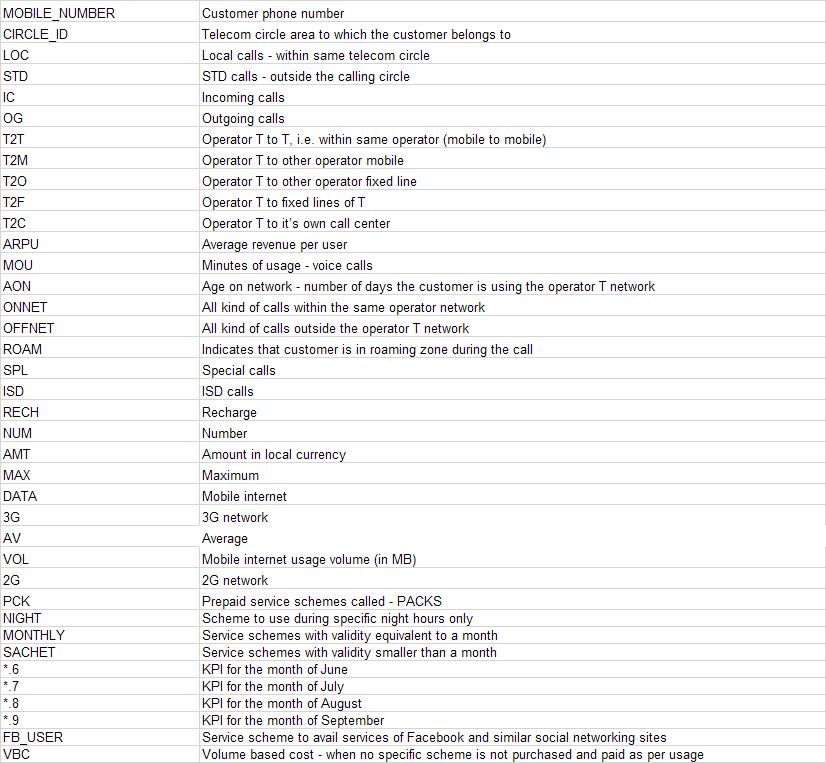

# Reading Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
# Importing Dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
df.shape

(99999, 226)

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [7]:
df.select_dtypes(include=['object','category']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [8]:
date_cols = df.select_dtypes(include=['object','category']).columns
df[date_cols] = df[date_cols].apply(pd.to_datetime)
df[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

In [9]:
df[date_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
1,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
2,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
3,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


In [10]:
# Creating a dataset for % null values

df_na = 100*df.isna().sum()/df.shape[0]
df_na.sort_values(ascending = False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

In [11]:
# Columns where more than 50% data are Null value
df_na[df_na >50]

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

## Filter high-value customers
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [12]:
# All columns with information regarding recharge 
rech_cols = []
for col in df.columns:
    a = col.split('_')
    if 'rech' in a:
        rech_cols.append(col)
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [13]:
df[rech_cols].head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,4,9,11,5,74,384,283,121,44,154,65,50,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
2,5,4,2,7,168,315,116,358,86,200,86,100,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
3,10,11,18,14,230,310,601,410,60,50,50,50,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6,3,4,196,350,287,200,56,110,110,50,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [14]:
# Average recharge amount per month for good phase
df['av_rech_amt_mnth'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)

In [15]:
# Dataset for high value customers
df_highvalue = df[df['av_rech_amt_mnth']>=df['av_rech_amt_mnth'].quantile(0.7)]
df_highvalue.shape

(30011, 227)

In [16]:
# Creating a dataset for % null values

df_na = 100*df_highvalue.isna().sum()/df_highvalue.shape[0]
df_na

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.379861
std_og_t2o_mou               0.379861
loc_ic_t2o_mou               0.379861
last_date_of_month_6         0.000000
last_date_of_month_7         0.103295
last_date_of_month_8         0.523142
last_date_of_month_9         1.199560
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  1.052947
onnet_mou_7                  1.009630
onnet_mou_8                  3.125521
onnet_mou_9                  5.677918
offnet_mou_6                 1.052947
offnet_mou_7                 1.009630
offnet_mou_8                 3.125521
offnet_mou_9                 5.677918
roam_ic_mou_6                1.052947
roam_ic_mou_7                1.009630
roam_ic_mou_8                3.125521
roam_ic_mou_9                5.677918
roam_og_mou_6                1.052947
roam_og_mou_

In [17]:
df_highvalue.shape

(30011, 227)

In [18]:
# Removing columns where more than 50% are null value
df_highvalue = df_highvalue[df_na[df_na<50].index]

In [19]:
df_highvalue.shape

(30011, 187)

## Tagging Churns
This is done based on forth month data. Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase will be tagged for churn. The attributesused to tag churners are:
- `total_ic_mou_9`
- `total_og_mou_9`
- `vol_2g_mb_9`
- `vol_3g_mb_9`

In [20]:
df_highvalue['Churn'] = 0

In [21]:
df_highvalue.loc[((df_highvalue['total_ic_mou_9'] == 0) & (df_highvalue['total_og_mou_9'] == 0) & 
             (df_highvalue['vol_2g_mb_9'] == 0) & (df_highvalue['vol_3g_mb_9'] == 0)),'Churn'] = 1

In [22]:
df_highvalue['Churn'].value_counts()

0    27418
1     2593
Name: Churn, dtype: int64

In [23]:
df_highvalue.shape

(30011, 188)

## Treating NA values

In [24]:
df_na = 100*df_highvalue.isna().sum()/df_highvalue.shape[0]
df_na.sort_values(ascending = False)

loc_ic_mou_9            5.677918
std_ic_t2o_mou_9        5.677918
roam_og_mou_9           5.677918
std_ic_mou_9            5.677918
loc_og_t2t_mou_9        5.677918
loc_og_t2m_mou_9        5.677918
std_ic_t2t_mou_9        5.677918
loc_og_t2f_mou_9        5.677918
og_others_9             5.677918
loc_og_t2c_mou_9        5.677918
loc_og_mou_9            5.677918
roam_ic_mou_9           5.677918
std_og_t2t_mou_9        5.677918
std_ic_t2m_mou_9        5.677918
std_og_t2m_mou_9        5.677918
spl_og_mou_9            5.677918
std_og_t2f_mou_9        5.677918
std_ic_t2f_mou_9        5.677918
std_og_t2c_mou_9        5.677918
std_og_mou_9            5.677918
loc_ic_t2t_mou_9        5.677918
isd_og_mou_9            5.677918
loc_ic_t2f_mou_9        5.677918
isd_ic_mou_9            5.677918
offnet_mou_9            5.677918
spl_ic_mou_9            5.677918
ic_others_9             5.677918
loc_ic_t2m_mou_9        5.677918
onnet_mou_9             5.677918
loc_og_mou_8            3.125521
isd_ic_mou

All columns has less than 5% NA values. Therefore removing those values

In [25]:
df_highvalue.dropna(inplace=True)

In [26]:
df_na = 100*df_highvalue.isna().sum()/df_highvalue.shape[0]
df_na

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8    

In [27]:
df_highvalue.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 188 columns):
 #    Column                Non-Null Count  Dtype         
---   ------                --------------  -----         
 0    mobile_number         27418 non-null  int64         
 1    circle_id             27418 non-null  int64         
 2    loc_og_t2o_mou        27418 non-null  float64       
 3    std_og_t2o_mou        27418 non-null  float64       
 4    loc_ic_t2o_mou        27418 non-null  float64       
 5    last_date_of_month_6  27418 non-null  datetime64[ns]
 6    last_date_of_month_7  27418 non-null  datetime64[ns]
 7    last_date_of_month_8  27418 non-null  datetime64[ns]
 8    last_date_of_month_9  27418 non-null  datetime64[ns]
 9    arpu_6                27418 non-null  float64       
 10   arpu_7                27418 non-null  float64       
 11   arpu_8                27418 non-null  float64       
 12   arpu_9                27418 non-null  float64       
 13  

### Splitting the data in to Good Phase, Action Phase and Churn Phase

In [28]:
# Extracting columns for month 6 and 7 (Good Phase)
col_good = []
for col in df_highvalue.columns:
    if col[-1] in ['6','7']:
        col_good.append(col)
    if col[:3] in ['jun','jul']:
        col_good.append(col)

In [29]:
# Extracting columns for month 8 (Action Phase)
col_action = []
for col in df_highvalue.columns:
    if col[-1] == '8':
        col_action.append(col)
    if col[:3] == 'aug':
        col_action.append(col)

In [30]:
# Extracting columns for month 9 (Churn Phase)
col_churn = []
for col in df_highvalue.columns:
    if col[-1] == '9':
        col_churn.append(col)
    if col[:3] == 'sep':
        col_churn.append(col)

In [31]:
df_good = df_highvalue[col_good] # Dataset for good months
df_action = df_highvalue[col_action] # Dataset for action month
df_churn = df_highvalue[col_churn] # Dataset for churn month

In [32]:
for col in col_churn:
    df_highvalue.drop(col,axis=1,inplace=True)
df_highvalue.shape

(27418, 143)

In [33]:
# creating a list of features that are not there in df_action but maybe required
col_list = list(df_na[1:5].index)
col_list.append('Churn')
col_list

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'Churn']

In [34]:
# Addind these columns to df_action
for col in col_list:
    df_action.loc[:,col] = df_highvalue.loc[:,col]
df_action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_date_of_month_8  27418 non-null  datetime64[ns]
 1   arpu_8                27418 non-null  float64       
 2   onnet_mou_8           27418 non-null  float64       
 3   offnet_mou_8          27418 non-null  float64       
 4   roam_ic_mou_8         27418 non-null  float64       
 5   roam_og_mou_8         27418 non-null  float64       
 6   loc_og_t2t_mou_8      27418 non-null  float64       
 7   loc_og_t2m_mou_8      27418 non-null  float64       
 8   loc_og_t2f_mou_8      27418 non-null  float64       
 9   loc_og_t2c_mou_8      27418 non-null  float64       
 10  loc_og_mou_8          27418 non-null  float64       
 11  std_og_t2t_mou_8      27418 non-null  float64       
 12  std_og_t2m_mou_8      27418 non-null  float64       
 13  std_og_t2f_mou_8

### Creating additional features

In [35]:
# Creating columns for number of days before end of month when recharge was done
df_highvalue['days_rech_6'] = (df_highvalue['last_date_of_month_6'] - df_highvalue['date_of_last_rech_6']).dt.days
df_highvalue['days_rech_7'] = (df_highvalue['last_date_of_month_7'] - df_highvalue['date_of_last_rech_7']).dt.days
df_highvalue['days_rech_8'] = (df_highvalue['last_date_of_month_8'] - df_highvalue['date_of_last_rech_8']).dt.days

In [36]:
# Removig Datetime columns
df_highvalue.drop(['last_date_of_month_6','date_of_last_rech_6',
                   'last_date_of_month_7','date_of_last_rech_7',
                   'last_date_of_month_8','date_of_last_rech_8'],axis=1,inplace=True)

In [37]:
# Change in recharge amount from good phase to action phase

df_highvalue['rech_change'] = df_highvalue['av_rech_amt_mnth'] - df_highvalue['total_rech_amt_8']

In [38]:
df_highvalue.drop(['av_rech_amt_mnth'],axis=1,inplace=True)

In [39]:
df_highvalue.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 140 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    mobile_number       27418 non-null  int64  
 1    circle_id           27418 non-null  int64  
 2    loc_og_t2o_mou      27418 non-null  float64
 3    std_og_t2o_mou      27418 non-null  float64
 4    loc_ic_t2o_mou      27418 non-null  float64
 5    arpu_6              27418 non-null  float64
 6    arpu_7              27418 non-null  float64
 7    arpu_8              27418 non-null  float64
 8    onnet_mou_6         27418 non-null  float64
 9    onnet_mou_7         27418 non-null  float64
 10   onnet_mou_8         27418 non-null  float64
 11   offnet_mou_6        27418 non-null  float64
 12   offnet_mou_7        27418 non-null  float64
 13   offnet_mou_8        27418 non-null  float64
 14   roam_ic_mou_6       27418 non-null  float64
 15   roam_ic_mou_7       27418 non-null

In [40]:
df_highvalue.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn,days_rech_6,days_rech_7,days_rech_8,rech_change
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,5,0,1,399.0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0,10,9,1,-337.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,34

## Univariate and Bivariate Analysis

In [41]:
# Finding columns which have only one entry in df_highvalue
col = []
for c in df_highvalue.columns:
    n= len(df_highvalue[c].unique())
    if n==1:
        col.append(c)
        print(c,n)
        

circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
std_og_t2c_mou_6 1
std_og_t2c_mou_7 1
std_og_t2c_mou_8 1
std_ic_t2o_mou_6 1
std_ic_t2o_mou_7 1
std_ic_t2o_mou_8 1


Above columns only have a single value in it. So we can safely remove them

In [42]:
col

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [43]:
df_highvalue.shape

(27418, 140)

In [44]:
df_highvalue.drop(col,axis=1,inplace=True)

In [45]:
# Dropping Mobile Number
df_highvalue.drop('mobile_number',axis=1,inplace=True)

In [46]:
df_highvalue.shape

(27418, 129)

In [47]:
df_highvalue.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 129 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    arpu_6              27418 non-null  float64
 1    arpu_7              27418 non-null  float64
 2    arpu_8              27418 non-null  float64
 3    onnet_mou_6         27418 non-null  float64
 4    onnet_mou_7         27418 non-null  float64
 5    onnet_mou_8         27418 non-null  float64
 6    offnet_mou_6        27418 non-null  float64
 7    offnet_mou_7        27418 non-null  float64
 8    offnet_mou_8        27418 non-null  float64
 9    roam_ic_mou_6       27418 non-null  float64
 10   roam_ic_mou_7       27418 non-null  float64
 11   roam_ic_mou_8       27418 non-null  float64
 12   roam_og_mou_6       27418 non-null  float64
 13   roam_og_mou_7       27418 non-null  float64
 14   roam_og_mou_8       27418 non-null  float64
 15   loc_og_t2t_mou_6    27418 non-null

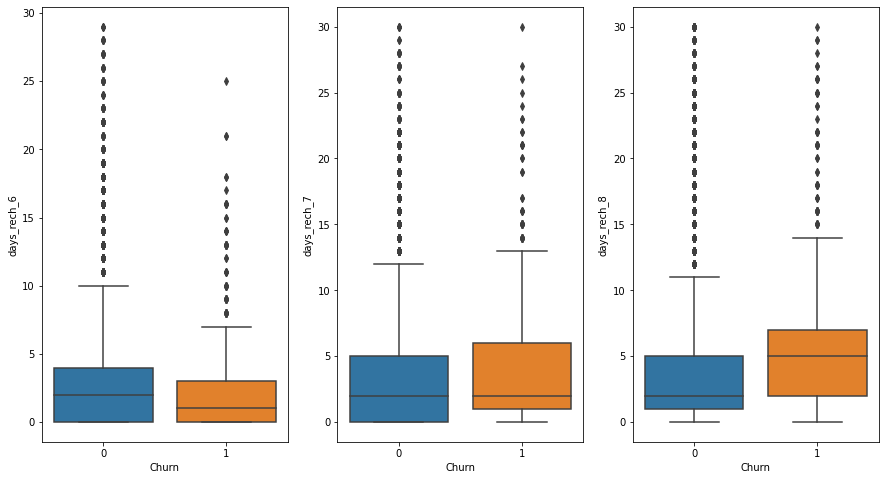

In [48]:
plt.figure(figsize=(15,8))

plt.subplot(131)
sns.boxplot(data=df_highvalue, x='Churn',y = 'days_rech_6')

plt.subplot(132)
sns.boxplot(data=df_highvalue, x='Churn',y = 'days_rech_7')

plt.subplot(133)
sns.boxplot(data=df_highvalue, x='Churn',y = 'days_rech_8')

plt.show()


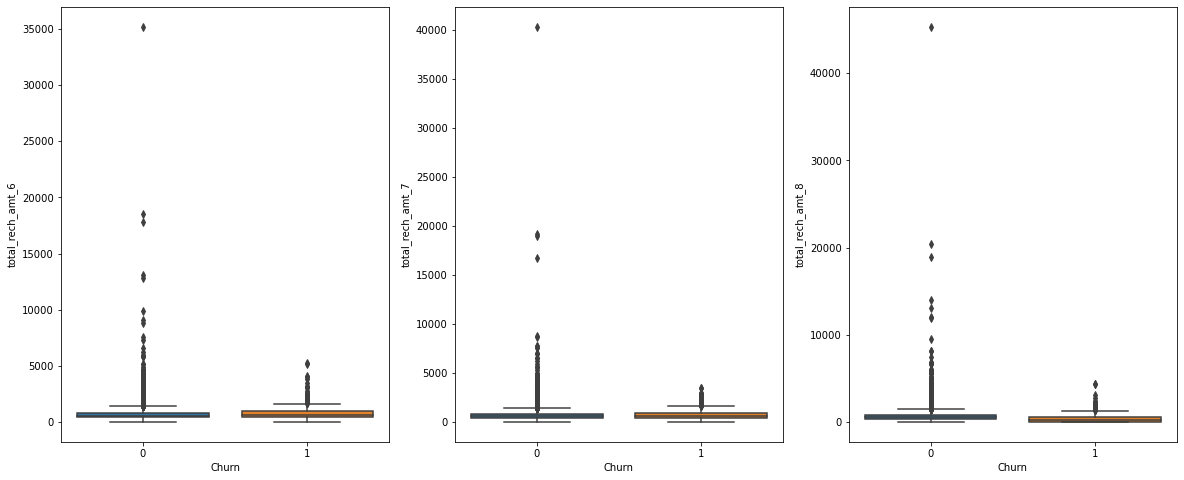

In [49]:
plt.figure(figsize=(20,8))

plt.subplot(131)
sns.boxplot(data=df_highvalue, x='Churn',y = 'total_rech_amt_6')

plt.subplot(132)
sns.boxplot(data=df_highvalue, x='Churn',y = 'total_rech_amt_7')

plt.subplot(133)
sns.boxplot(data=df_highvalue, x='Churn',y = 'total_rech_amt_8')

plt.show()


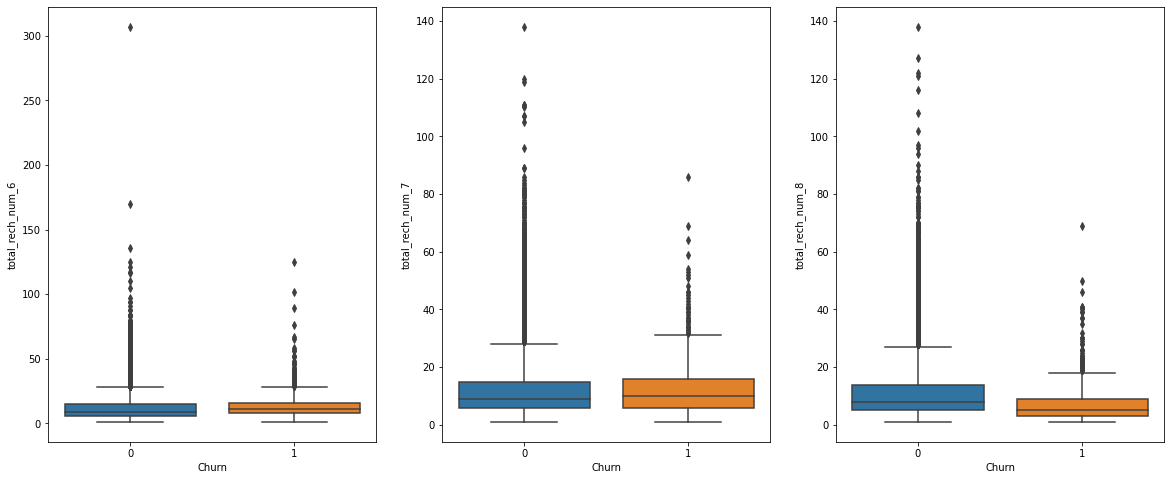

In [50]:
plt.figure(figsize=(20,8))

plt.subplot(131)
sns.boxplot(data=df_highvalue, x='Churn',y = 'total_rech_num_6')

plt.subplot(132)
sns.boxplot(data=df_highvalue, x='Churn',y = 'total_rech_num_7')

plt.subplot(133)
sns.boxplot(data=df_highvalue, x='Churn',y = 'total_rech_num_8')

plt.show()


In [51]:
df_highvalue['total_rech_amt_6'].quantile([0.25,0.5,0.75,0.9,0.99,1])

0.25      433.00
0.50      580.00
0.75      824.75
0.90     1165.00
0.99     2338.49
1.00    35190.00
Name: total_rech_amt_6, dtype: float64

In [52]:
df_highvalue['total_rech_amt_7'].quantile([0.25,0.5,0.75,0.9,0.99,1])

0.25      435.00
0.50      586.00
0.75      836.00
0.90     1193.30
0.99     2408.32
1.00    40335.00
Name: total_rech_amt_7, dtype: float64

In [53]:
df_highvalue['total_rech_amt_8'].quantile([0.25,0.5,0.75,0.9,0.99,1])

0.25      350.00
0.50      545.00
0.75      808.00
0.90     1177.00
0.99     2363.98
1.00    45320.00
Name: total_rech_amt_8, dtype: float64

In [54]:
#create the buckets of <300, 300-500, 500-1000,1000-2000 and 2000+ from total_rech_amt_6 column.
df_highvalue['total_rech_amt_6_grp']=pd.cut(df_highvalue['total_rech_amt_6'],[0,300,500,1000,2000,99999],labels 
                                            = ['<300','300-500','500-1000','1000-2000','2000+'])

In [55]:
#create the buckets of <300, 300-500, 500-1000,1000-2000 and 2000+ from total_rech_amt_7 column.
df_highvalue['total_rech_amt_7_grp']=pd.cut(df_highvalue['total_rech_amt_7'],[0,300,500,1000,2000,99999],labels 
                                            = ['<300','300-500','500-1000','1000-2000','2000+'])

In [56]:
#create the buckets of <300, 300-500, 500-1000,1000-2000 and 2000+ from total_rech_amt_8 column.
df_highvalue['total_rech_amt_8_grp']=pd.cut(df_highvalue['total_rech_amt_8'],[0,300,500,1000,2000,99999],labels 
                                            = ['<300','300-500','500-1000','1000-2000','2000+'])

In [57]:
def plotting(app_df, app_tar0, app_tar1, column):
    
    train = app_df
    train_0 = app_tar0
    train_1 = app_tar1
    col = column
    
    grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
    fig = plt.figure(figsize=(15,15))
    
    ax1 = plt.subplot(grid[0,0:])
    sns.countplot(y=train[col])
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(grid[1,0])
    sns.countplot(x= column, hue = 'Churn', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(grid[1,1])
    df = pd.DataFrame()
    df['0']= (100*(train_0[col].value_counts())/len(train_0))
    df['1']= (100*(train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [58]:
app_df = df_highvalue.copy()

In [59]:
app_tar0 = app_df[app_df.Churn == 0]
app_tar1 = app_df[app_df.Churn == 1]

In [60]:
cat = ['total_rech_amt_6_grp','total_rech_amt_7_grp','total_rech_amt_8_grp']

Plotting  total_rech_amt_6_grp


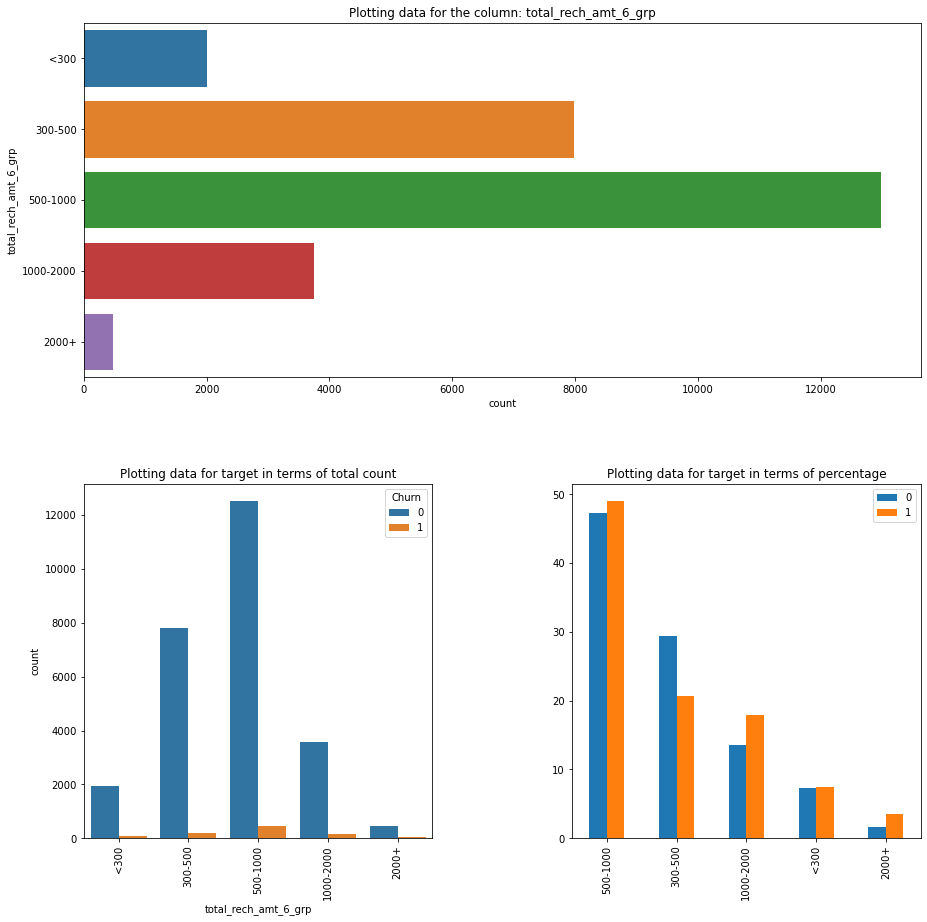

Plotting  total_rech_amt_7_grp


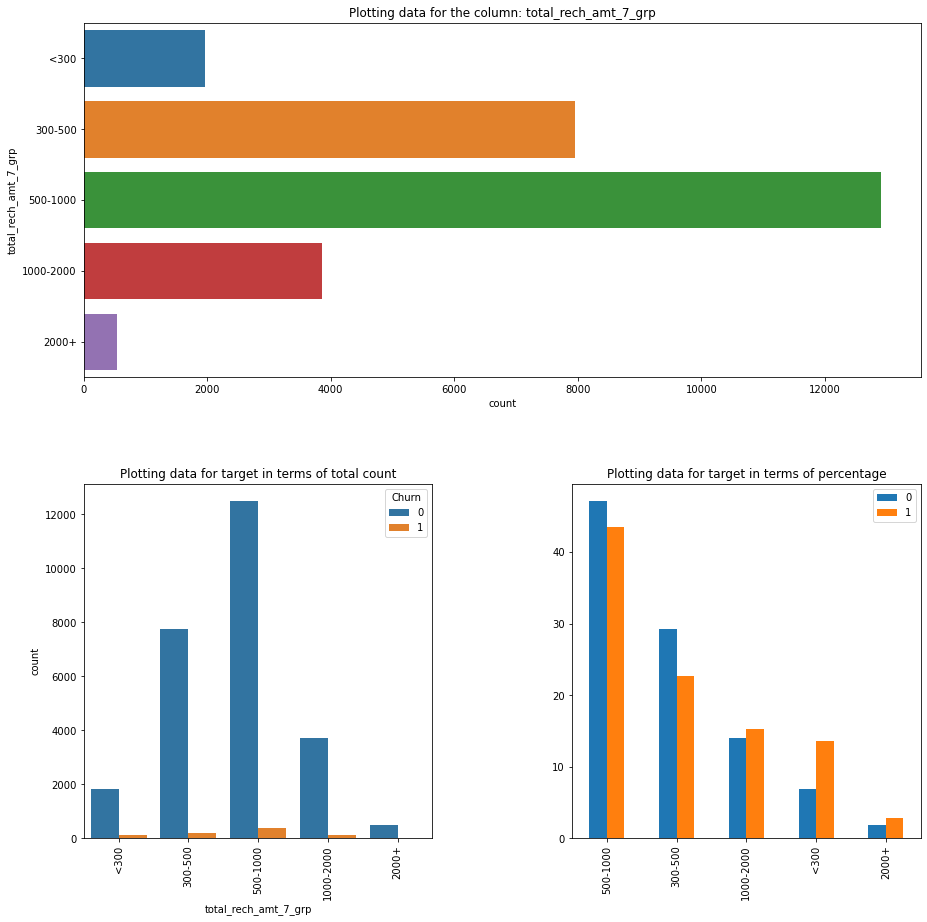

Plotting  total_rech_amt_8_grp


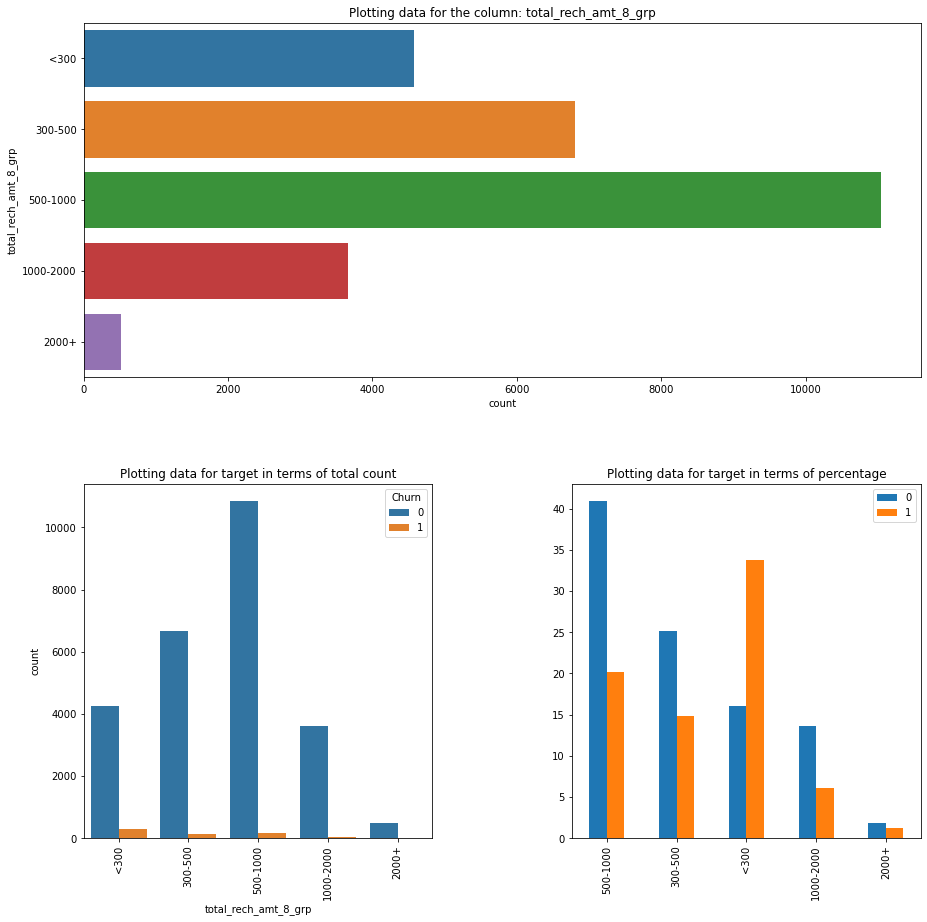

In [61]:
for column in cat:
    print("Plotting ", column)
    plotting(app_df,app_tar0, app_tar1, column)

In [62]:
df_action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_date_of_month_8  27418 non-null  datetime64[ns]
 1   arpu_8                27418 non-null  float64       
 2   onnet_mou_8           27418 non-null  float64       
 3   offnet_mou_8          27418 non-null  float64       
 4   roam_ic_mou_8         27418 non-null  float64       
 5   roam_og_mou_8         27418 non-null  float64       
 6   loc_og_t2t_mou_8      27418 non-null  float64       
 7   loc_og_t2m_mou_8      27418 non-null  float64       
 8   loc_og_t2f_mou_8      27418 non-null  float64       
 9   loc_og_t2c_mou_8      27418 non-null  float64       
 10  loc_og_mou_8          27418 non-null  float64       
 11  std_og_t2t_mou_8      27418 non-null  float64       
 12  std_og_t2m_mou_8      27418 non-null  float64       
 13  std_og_t2f_mou_8

In [63]:
# Extracting columns for month 8 with mou data (Action Phase)
col_action_mou = []
for col in df_action.columns:
    a= col.split('_')
    if 'mou' in a:
        col_action_mou.append(col)

In [64]:
col_action_mou

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou']

In [65]:
c = []
for col in col_action_mou:
#     print(col, len(df_action[col].unique()))
    c.append(len(df_action[col].unique()))
a={'Features':col_action_mou,
 'Counts': c}

mou_df = pd.DataFrame(a)
mou_df


,Features,Counts
0,onnet_mou_8,17161
1,offnet_mou_8,20764
2,roam_ic_mou_8,3527
3,roam_og_mou_8,4189
4,loc_og_t2t_mou_8,10620
5,loc_og_t2m_mou_8,15812
6,loc_og_t2f_mou_8,3060
7,loc_og_t2c_mou_8,1693
8,loc_og_mou_8,18378
9,std_og_t2t_mou_8,11413


These features have only a single value. So they can be removed from the dataset

In [66]:
list(mou_df[mou_df['Counts']==1]['Features'])

['std_og_t2c_mou_8',
 'std_ic_t2o_mou_8',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou']

In [67]:
for c in list(mou_df[mou_df['Counts']==1]['Features']):
    df_action.drop(c,axis=1,inplace=True)

In [68]:
df_action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_date_of_month_8  27418 non-null  datetime64[ns]
 1   arpu_8                27418 non-null  float64       
 2   onnet_mou_8           27418 non-null  float64       
 3   offnet_mou_8          27418 non-null  float64       
 4   roam_ic_mou_8         27418 non-null  float64       
 5   roam_og_mou_8         27418 non-null  float64       
 6   loc_og_t2t_mou_8      27418 non-null  float64       
 7   loc_og_t2m_mou_8      27418 non-null  float64       
 8   loc_og_t2f_mou_8      27418 non-null  float64       
 9   loc_og_t2c_mou_8      27418 non-null  float64       
 10  loc_og_mou_8          27418 non-null  float64       
 11  std_og_t2t_mou_8      27418 non-null  float64       
 12  std_og_t2m_mou_8      27418 non-null  float64       
 13  std_og_t2f_mou_8

In [69]:
# Extracting columns for month 8 without mou data (Action Phase)
col_action_notmou = list(df_action.columns)
for col in df_action.columns:
    a= col.split('_')
    if 'mou' in a:
        col_action_notmou.remove(col)
col_action_notmou

['last_date_of_month_8',
 'arpu_8',
 'og_others_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aug_vbc_3g',
 'circle_id',
 'Churn']

In [70]:
c = []
for col in col_action_notmou:
    c.append(len(df_action[col].unique()))
a={'Features':col_action_notmou,
 'Counts': c}

notmou_df = pd.DataFrame(a)
notmou_df

,Features,Counts
0,last_date_of_month_8,1
1,arpu_8,26837
2,og_others_8,129
3,ic_others_8,1233
4,total_rech_num_8,94
5,total_rech_amt_8,2269
6,max_rech_amt_8,179
7,date_of_last_rech_8,31
8,last_day_rch_amt_8,174
9,vol_2g_mb_8,7120


In [71]:
for c in list(notmou_df[notmou_df['Counts']==1]['Features']):
    df_action.drop(c,axis=1,inplace=True)
    

In [72]:
notmou_df = notmou_df[~(notmou_df['Counts']==1)]
notmou_df

,Features,Counts
1,arpu_8,26837
2,og_others_8,129
3,ic_others_8,1233
4,total_rech_num_8,94
5,total_rech_amt_8,2269
6,max_rech_amt_8,179
7,date_of_last_rech_8,31
8,last_day_rch_amt_8,174
9,vol_2g_mb_8,7120
10,vol_3g_mb_8,6862


### Creating Categorical Variables

In [73]:
for col in notmou_df['Features']:
    print(col,':',df_action[col].quantile([0,0.25,0.5,0.75,0.9,0.95,0.99,1]))

arpu_8 : 0.00     -345.12900
0.25      318.80675
0.50      470.48400
0.75      688.57150
0.90      998.54290
0.95     1277.58530
0.99     1990.07244
1.00    33543.62400
Name: arpu_8, dtype: float64
og_others_8 : 0.00      0.00
0.25      0.00
0.50      0.00
0.75      0.00
0.90      0.00
0.95      0.00
0.99      0.00
1.00    394.93
Name: og_others_8, dtype: float64
ic_others_8 : 0.00       0.0000
0.25       0.0000
0.50       0.0000
0.75       0.0800
0.90       1.3800
0.95       4.2300
0.99      22.3515
1.00    1209.8600
Name: ic_others_8, dtype: float64
total_rech_num_8 : 0.00      1.0
0.25      5.0
0.50      8.0
0.75     13.0
0.90     22.0
0.95     29.0
0.99     47.0
1.00    138.0
Name: total_rech_num_8, dtype: float64
total_rech_amt_8 : 0.00        0.00
0.25      350.00
0.50      545.00
0.75      808.00
0.90     1177.00
0.95     1509.15
0.99     2363.98
1.00    45320.00
Name: total_rech_amt_8, dtype: float64
max_rech_amt_8 : 0.00       0.0
0.25     100.0
0.50     130.0
0.75     198.0
0

#### `arpu_8`

In [74]:
#create the buckets of <300, 300-500, 500-1000,1000-2000 and 2000+ from arpu_6 column.
df_action['arpu_8_grp']=pd.cut(df_action['arpu_8'],[-400,100,300,500,1000,2000,99999],labels 
                                            = ['<100','100-300','300-500','500-1000','1000-2000','2000+'])

#### `total_rech_amt_8 `

In [75]:
#create the buckets of <300, 300-500, 500-1000,1000-2000 and 2000+ from total_rech_amt_8 column.
df_action['total_rech_amt_8_grp']=pd.cut(df_action['total_rech_amt_8'],[-10,100,300,500,1000,2000,99999],labels 
                                            = ['<100','100-300','300-500','500-1000','1000-2000','2000+'])

#### `max_rech_amt_8 `

In [76]:
#create the buckets of <100, 100-200, 200-300,300-500,500-1000 and 1000+ from max_rech_amt_8 column.
df_action['max_rech_amt_8_grp']=pd.cut(df_action['max_rech_amt_8'],[-10,100,200,300,500,1000,99999],labels 
                                            = ['<100','100-200','200-300','300-500','500-1000','1000+'])

#### `last_day_rch_amt_8 `

In [77]:
#create the buckets of <100, 100-200, 200-300,300-500,500-1000 and 1000+ from last_day_rch_amt_8 column.
df_action['last_day_rch_amt_8_grp']=pd.cut(df_action['last_day_rch_amt_8'],[-10,25,50,100,200,300,99999],labels 
                                            = ['<25','25-50','50-100','100-200','200-300','300+'])

#### `vol_2g_mb_8 `

In [78]:
#create the buckets of <100, 100-200, 200-300,300-500,500-1000 and 1000+ from vol_2g_mb_8 column.
df_action['vol_2g_mb_8_grp']=pd.cut(df_action['vol_2g_mb_8'],[-10,25,100,300,500,99999],labels 
                                            = ['<25','25-100','100-300','300-500','500+'])

#### `vol_3g_mb_8 `

In [79]:
#create the buckets of <100, 100-200, 200-300,300-500,500-1000 and 1000+ from vol_3g_mb_8 column.
df_action['vol_3g_mb_8_grp']=pd.cut(df_action['vol_3g_mb_8'],[-10,25,100,300,500,99999],labels 
                                            = ['<25','25-100','100-300','300-500','500+'])

#### `total_rech_num_8 `

In [80]:
#create the buckets of <100, 100-200, 200-300,300-500,500-1000 and 1000+ from vol_3g_mb_8 column.
df_action['total_rech_num_8_grp']=pd.cut(df_action['total_rech_num_8'],[0,5,10,20,30,50,99999],labels 
                                            = ['<5','5-10','10-20','20-30','30-50','50+'])

In [81]:
# Dropping columns

df_action.drop(['arpu_8','total_rech_amt_8','max_rech_amt_8','last_day_rch_amt_8',
                'vol_2g_mb_8','vol_3g_mb_8','date_of_last_rech_8','total_rech_num_8'],axis=1,inplace=True)

In [82]:
df_action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   onnet_mou_8             27418 non-null  float64 
 1   offnet_mou_8            27418 non-null  float64 
 2   roam_ic_mou_8           27418 non-null  float64 
 3   roam_og_mou_8           27418 non-null  float64 
 4   loc_og_t2t_mou_8        27418 non-null  float64 
 5   loc_og_t2m_mou_8        27418 non-null  float64 
 6   loc_og_t2f_mou_8        27418 non-null  float64 
 7   loc_og_t2c_mou_8        27418 non-null  float64 
 8   loc_og_mou_8            27418 non-null  float64 
 9   std_og_t2t_mou_8        27418 non-null  float64 
 10  std_og_t2m_mou_8        27418 non-null  float64 
 11  std_og_t2f_mou_8        27418 non-null  float64 
 12  std_og_mou_8            27418 non-null  float64 
 13  isd_og_mou_8            27418 non-null  float64 
 14  spl_og_mou_8          

In [83]:
app_df = df_action.copy()

In [84]:
app_tar0 = app_df[app_df.Churn == 0]
app_tar1 = app_df[app_df.Churn == 1]

In [85]:
cat_cols = list(app_df.select_dtypes('category').columns)
cat_cols

['arpu_8_grp',
 'total_rech_amt_8_grp',
 'max_rech_amt_8_grp',
 'last_day_rch_amt_8_grp',
 'vol_2g_mb_8_grp',
 'vol_3g_mb_8_grp',
 'total_rech_num_8_grp']

Plotting  arpu_8_grp


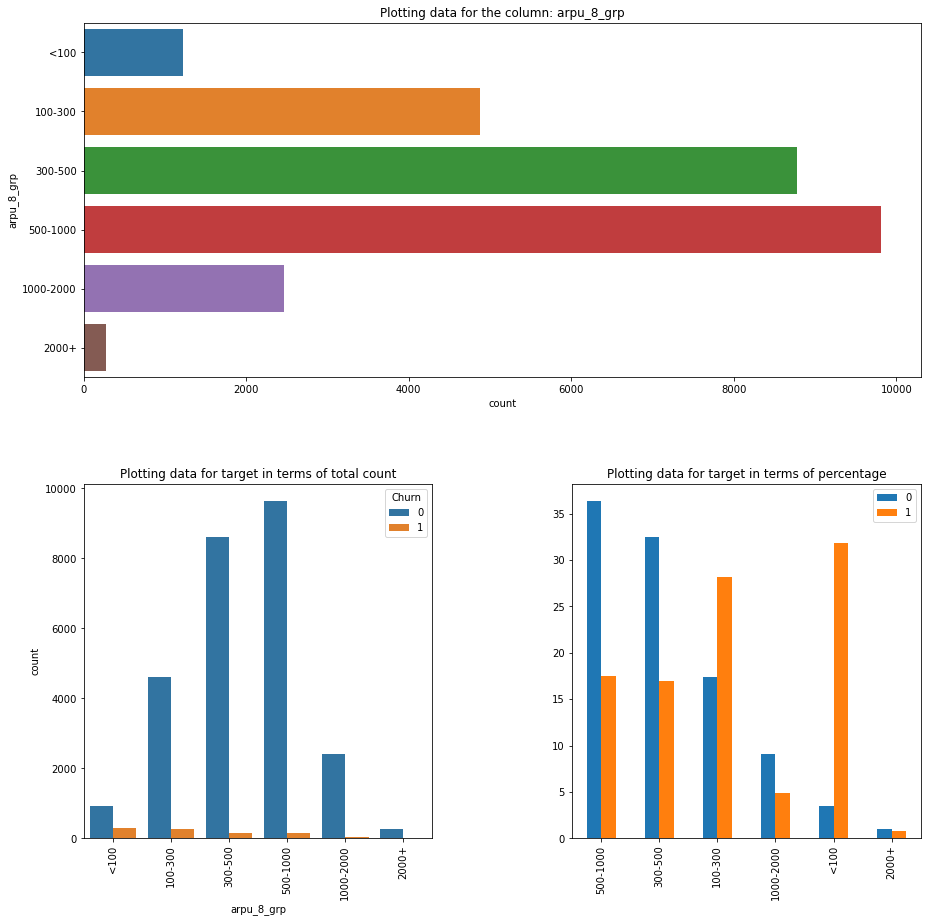

Plotting  total_rech_amt_8_grp


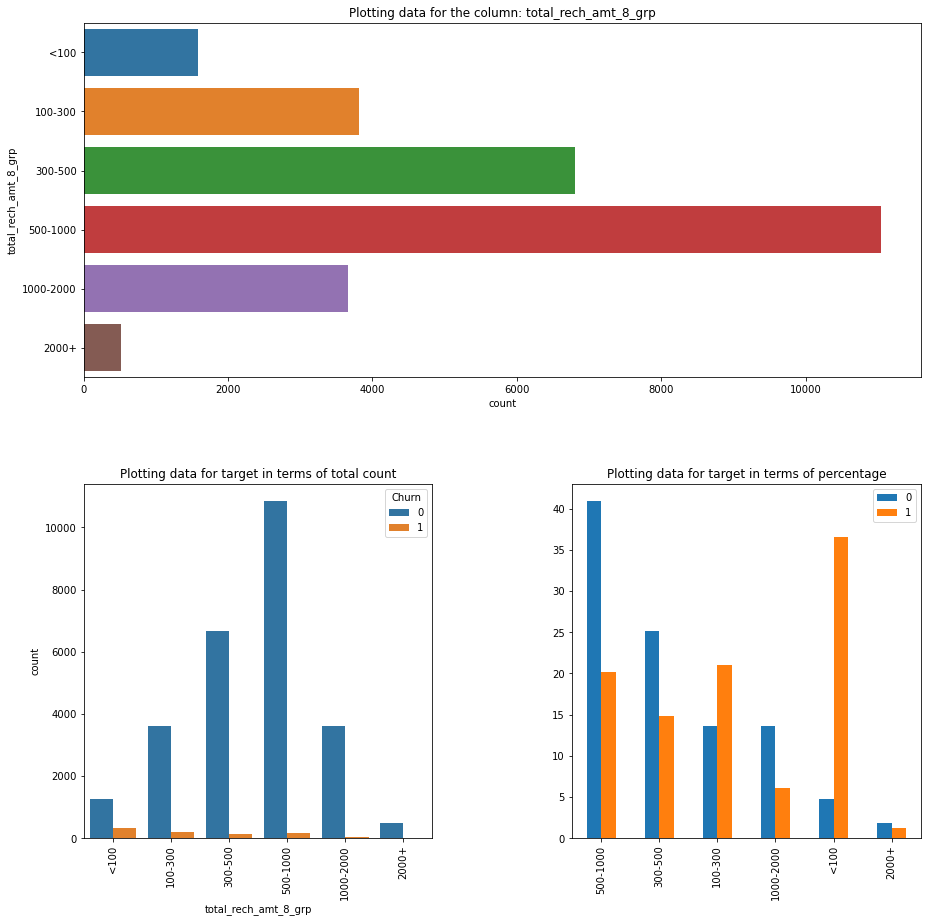

Plotting  max_rech_amt_8_grp


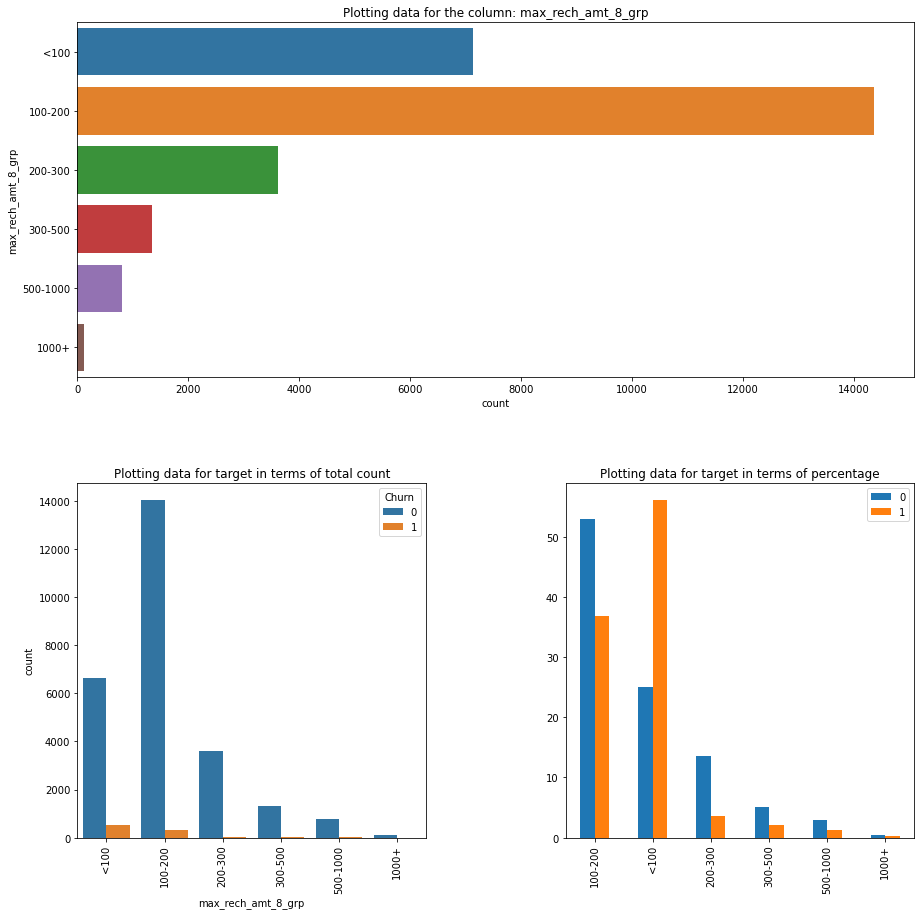

Plotting  last_day_rch_amt_8_grp


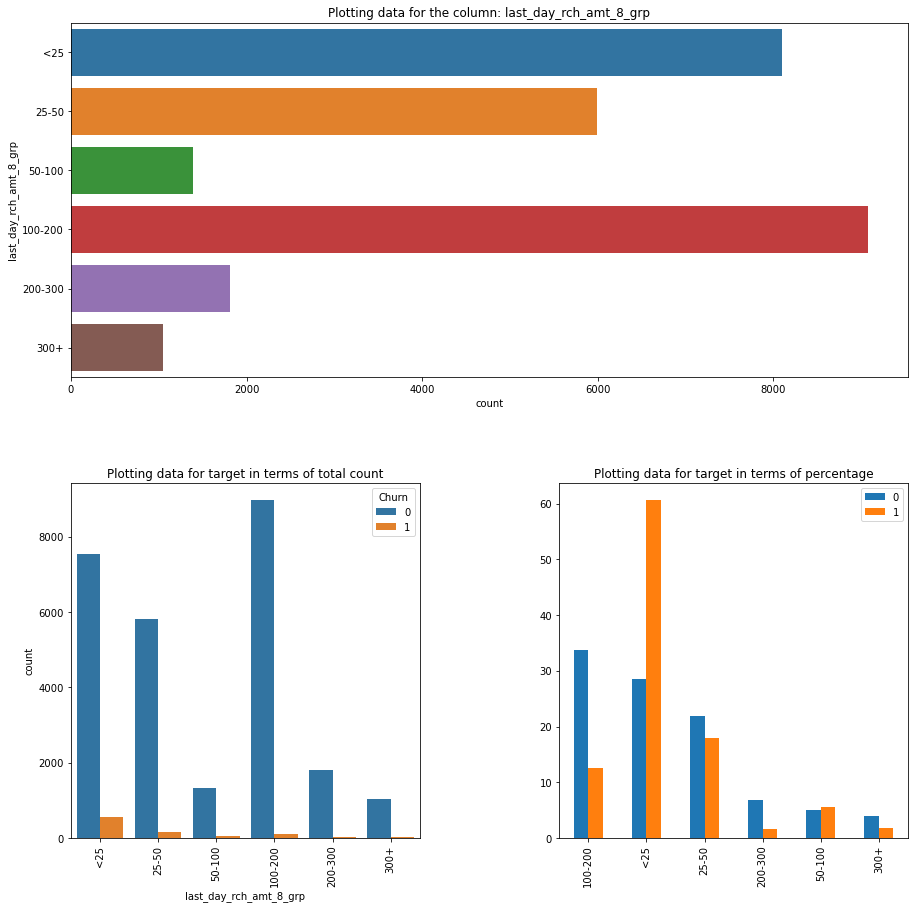

Plotting  vol_2g_mb_8_grp


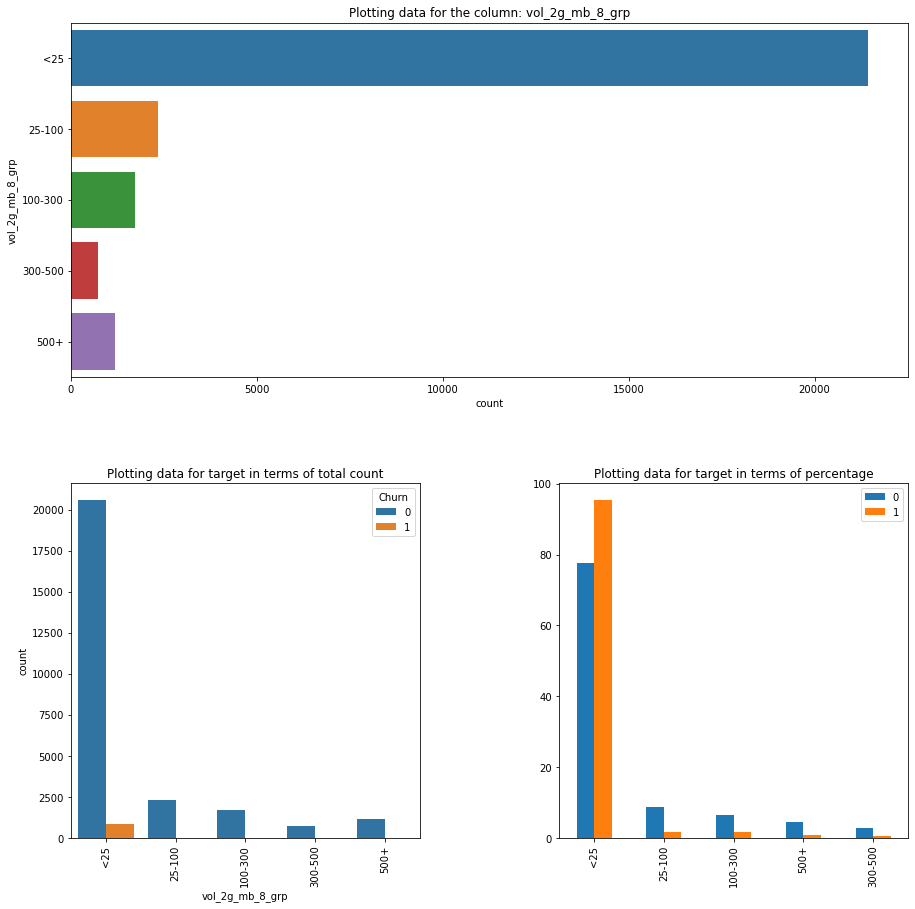

Plotting  vol_3g_mb_8_grp


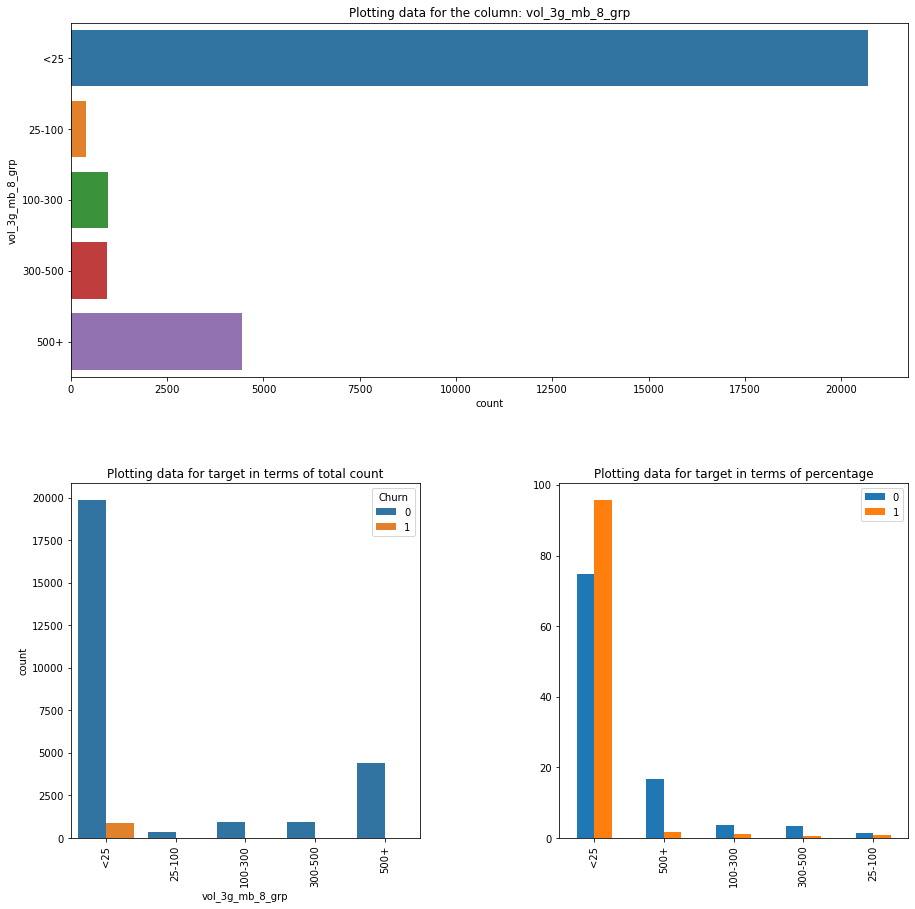

Plotting  total_rech_num_8_grp


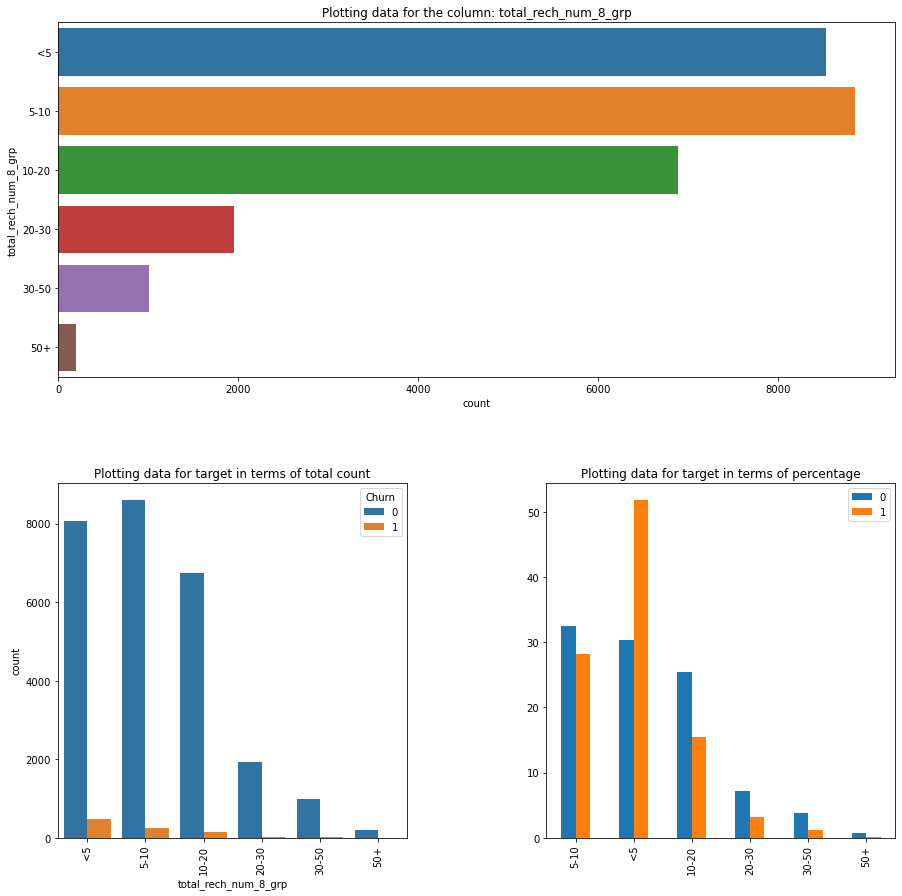

In [86]:
for column in cat_cols:
    print("Plotting ", column)
    plotting(app_df,app_tar0, app_tar1, column)

In [88]:
# Extracting columns for month 8 with mou data (Action Phase)
col_action_mou = []
for col in df_action.columns:
    a= col.split('_')
    if 'mou' in a:
        col_action_mou.append(col)

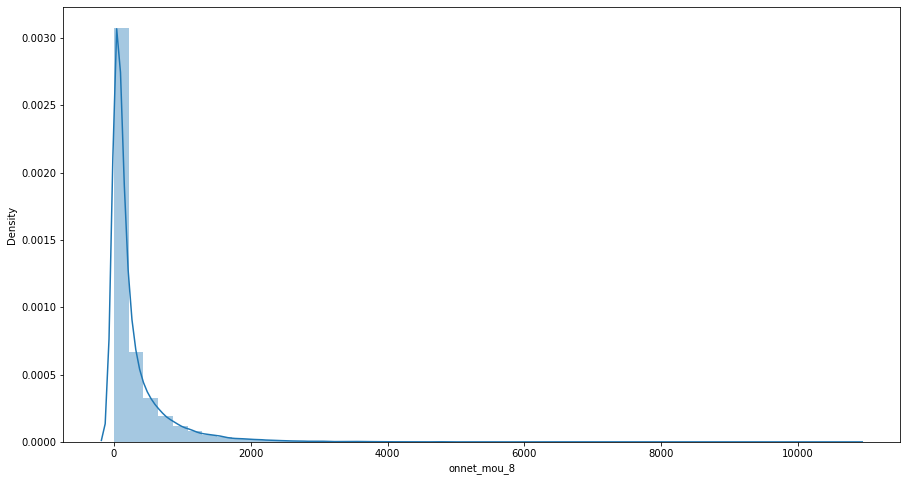

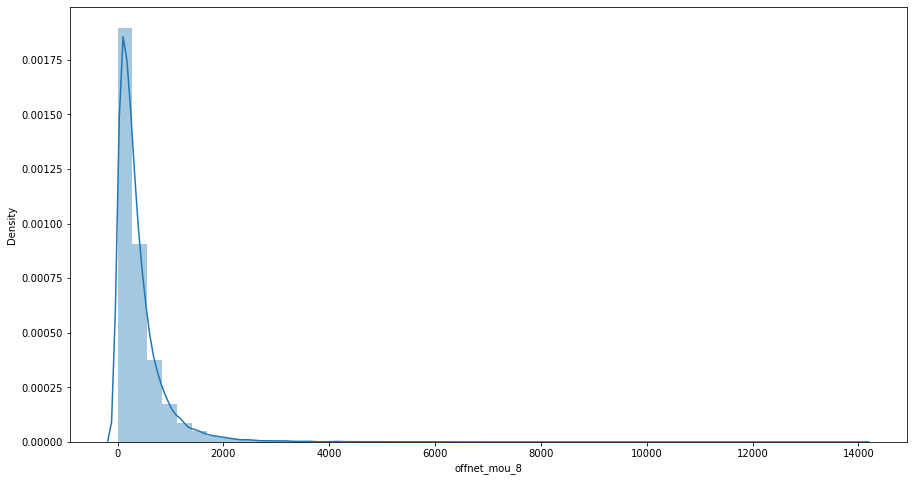

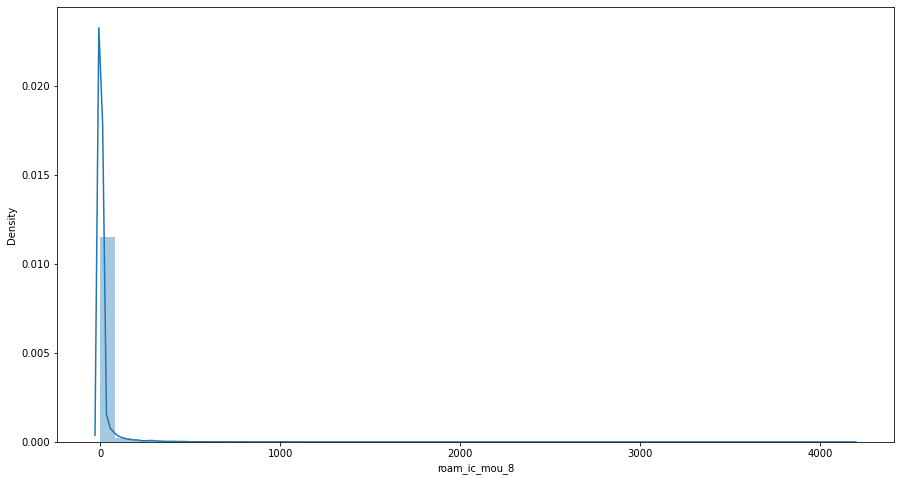

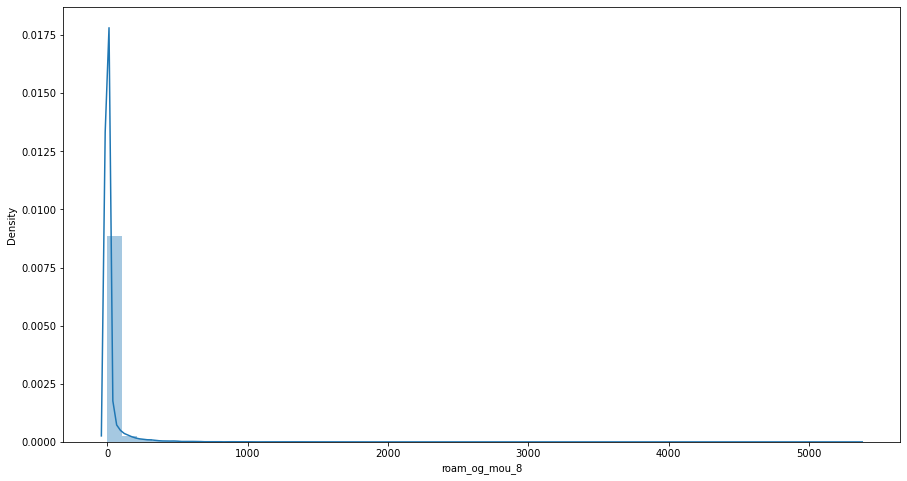

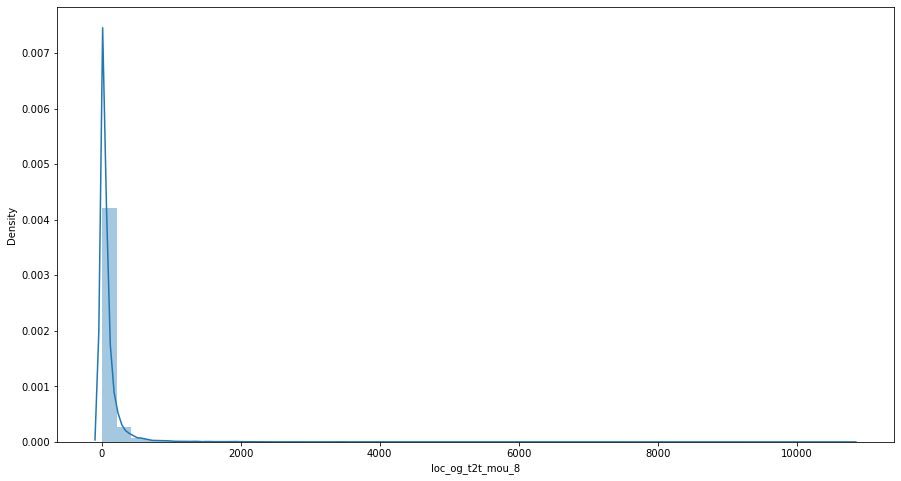

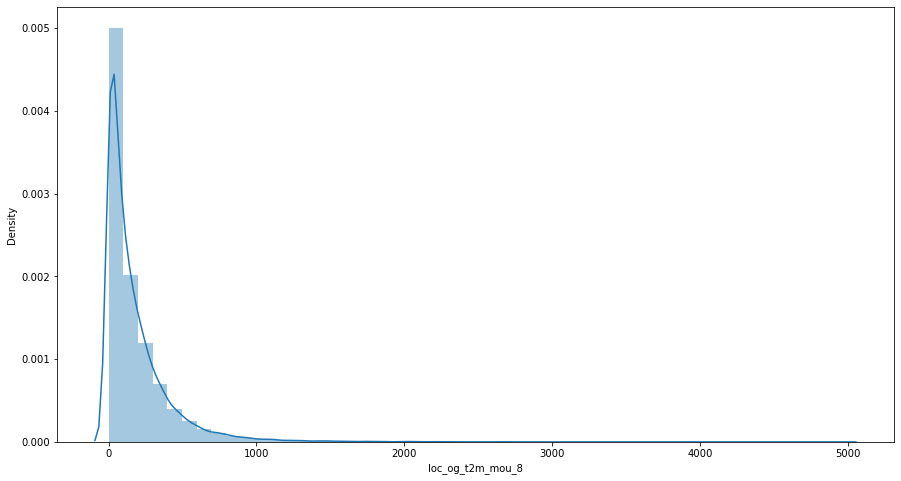

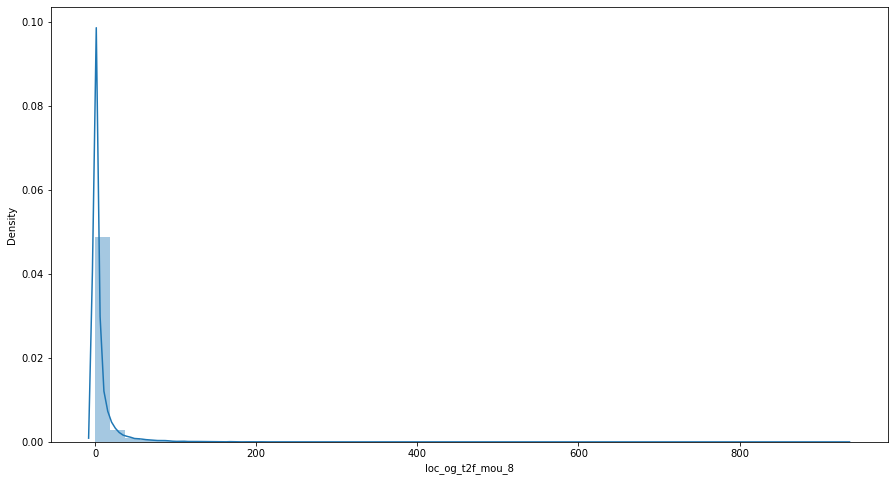

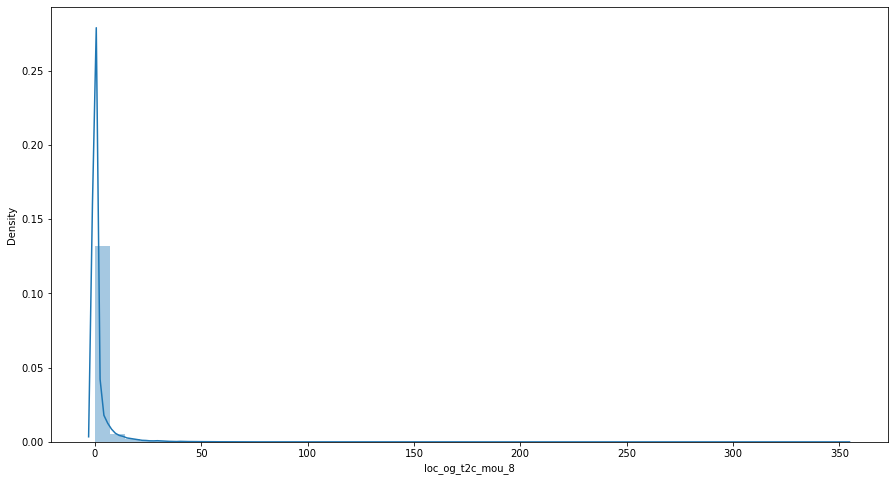

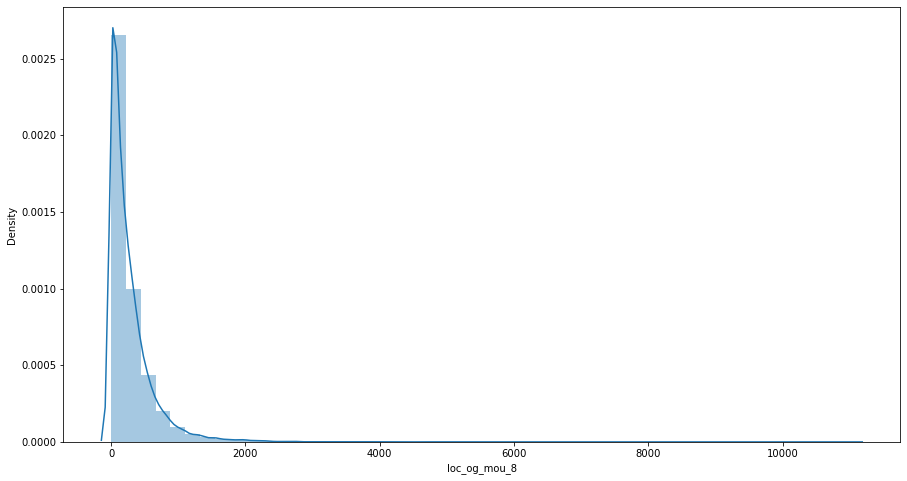

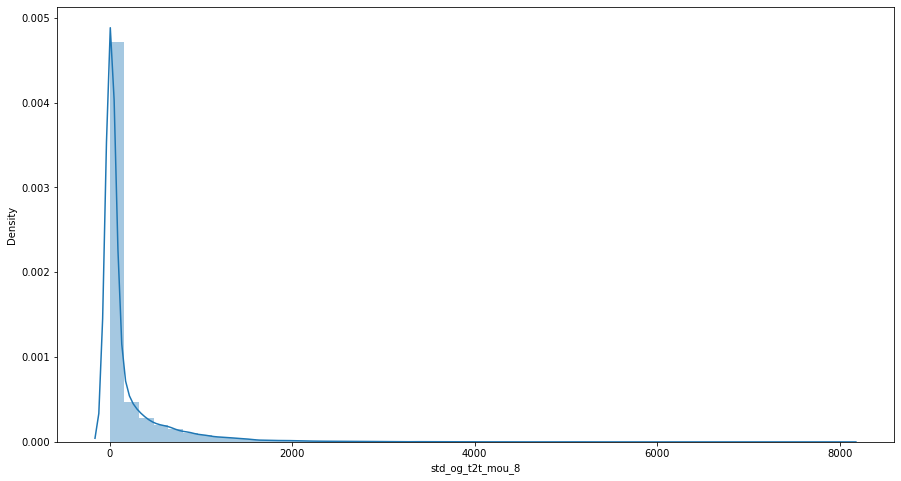

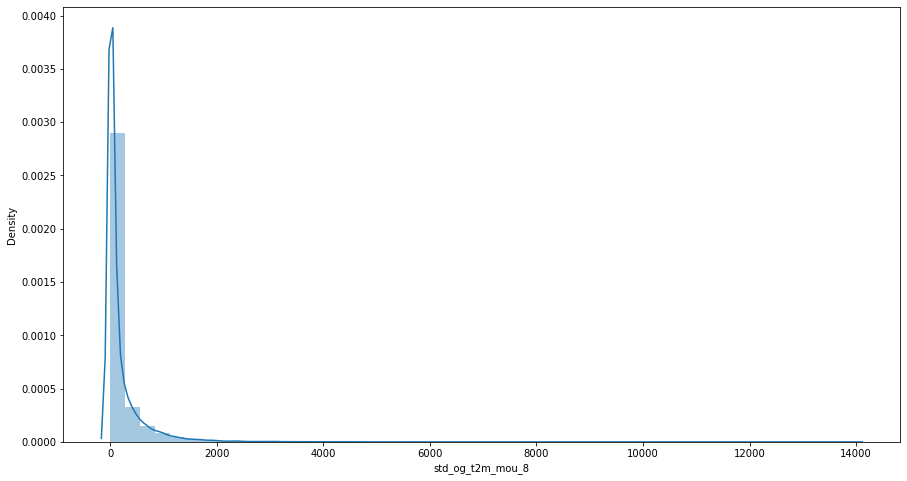

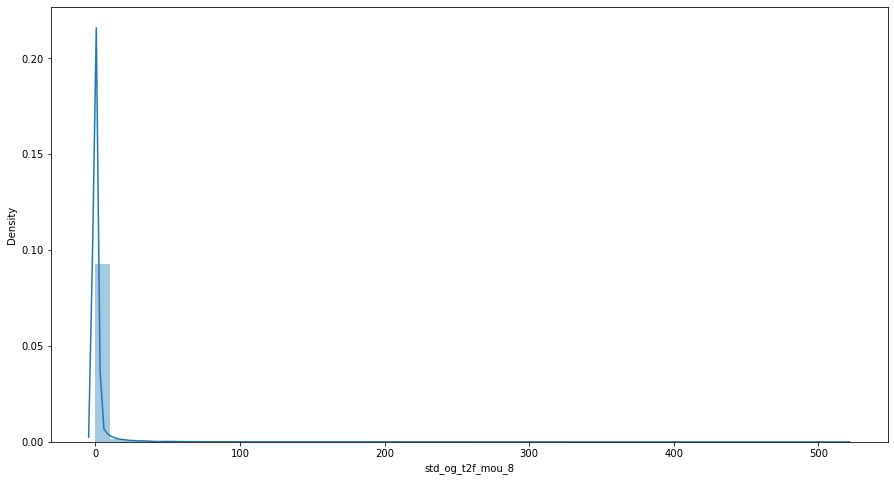

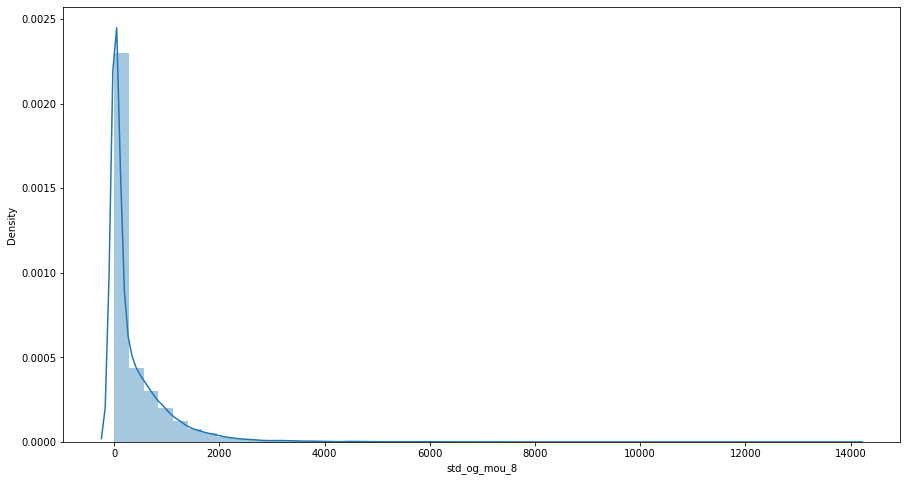

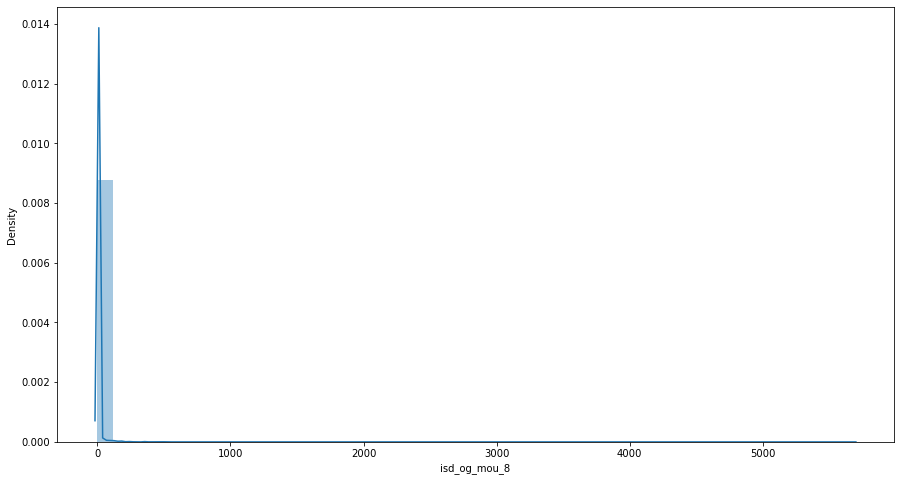

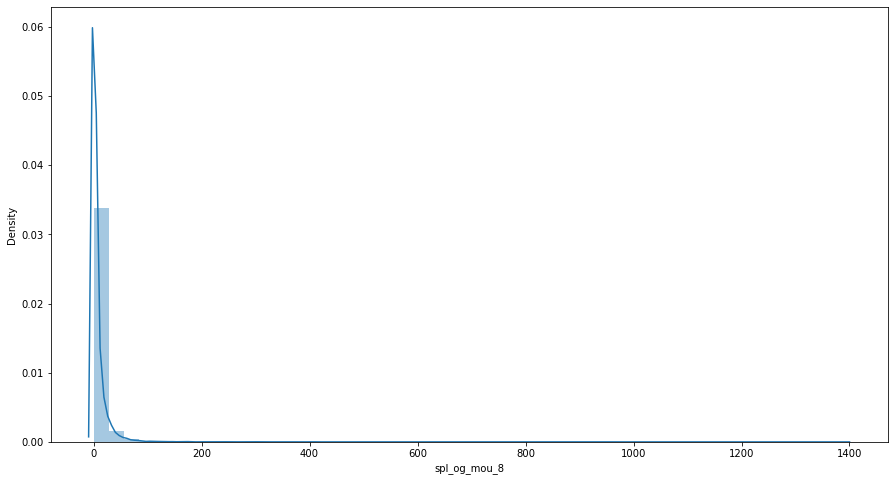

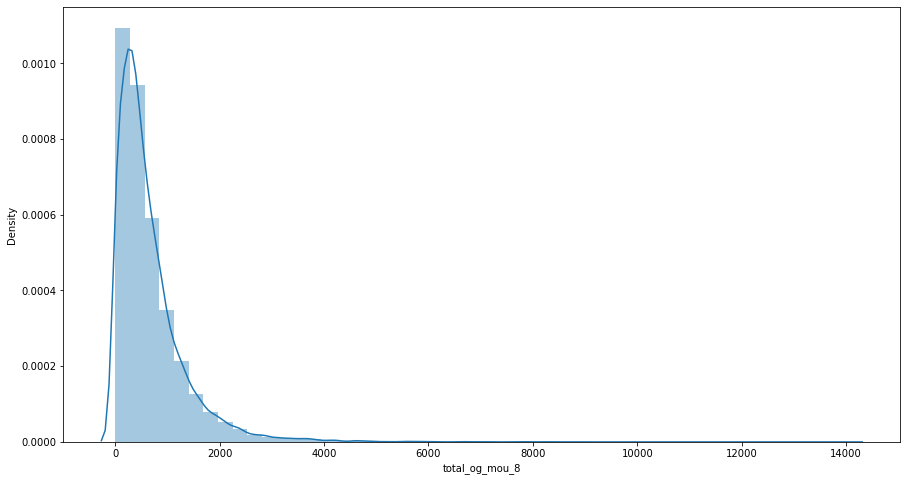

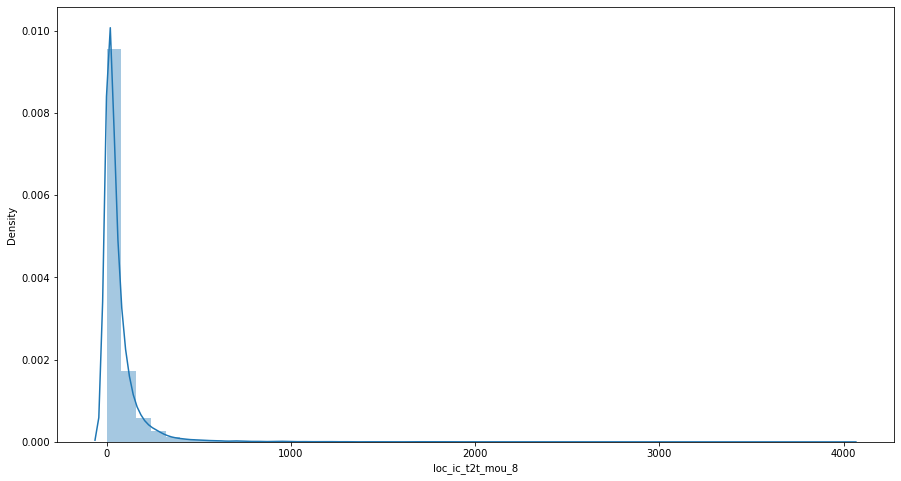

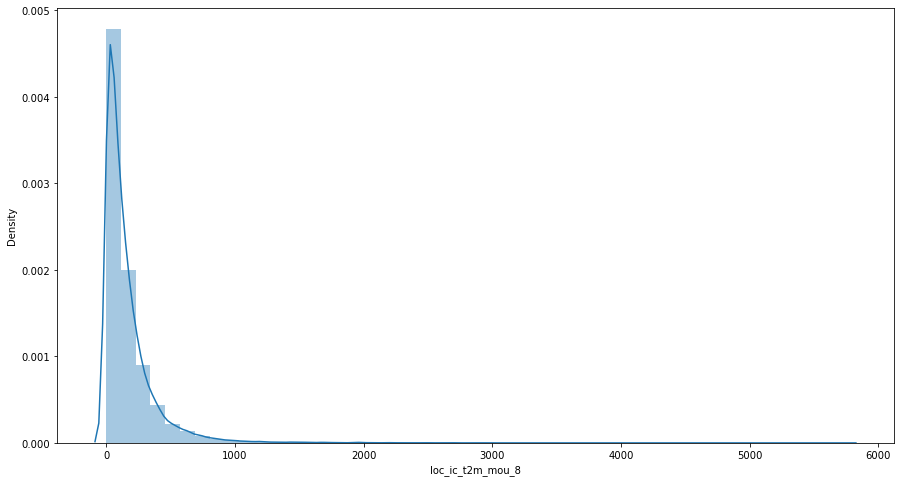

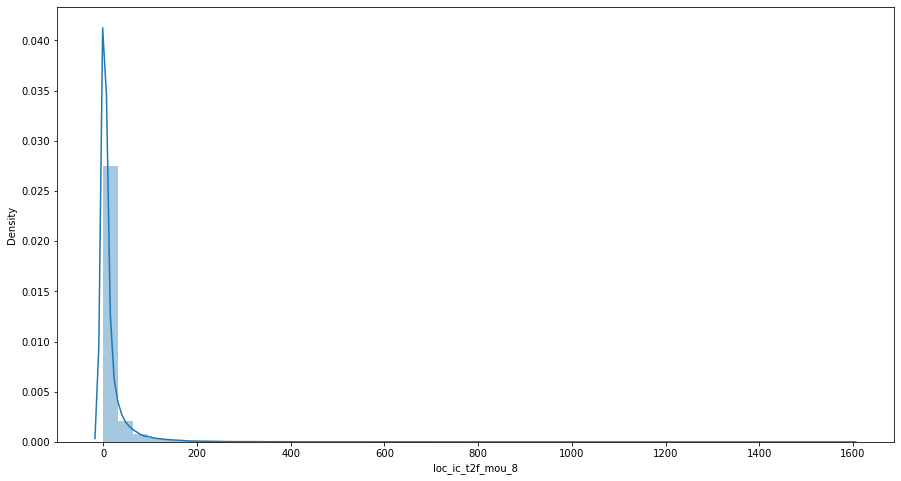

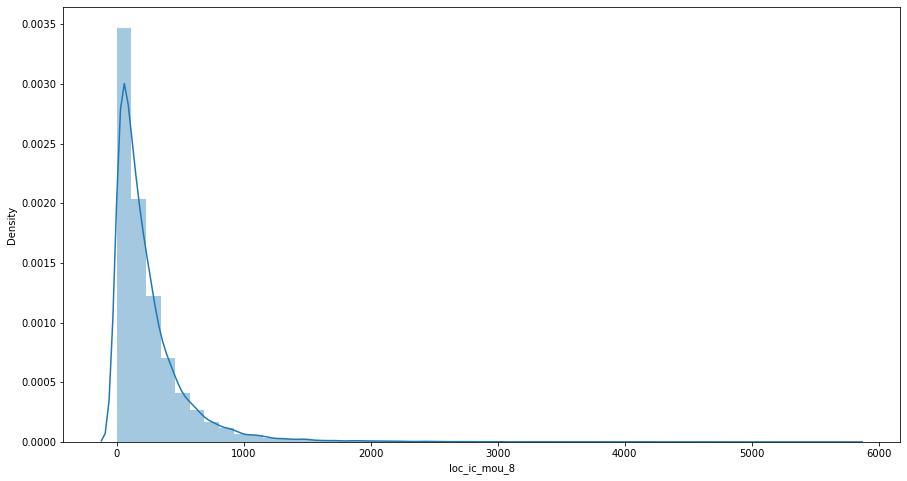

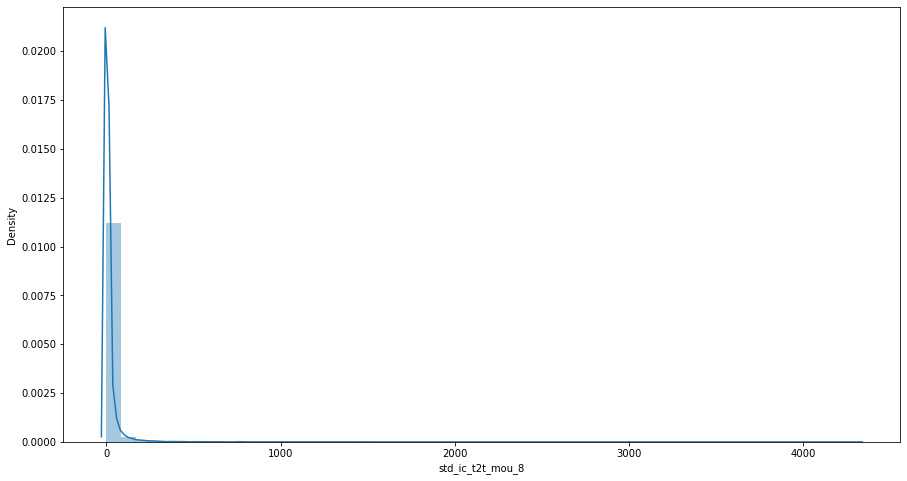

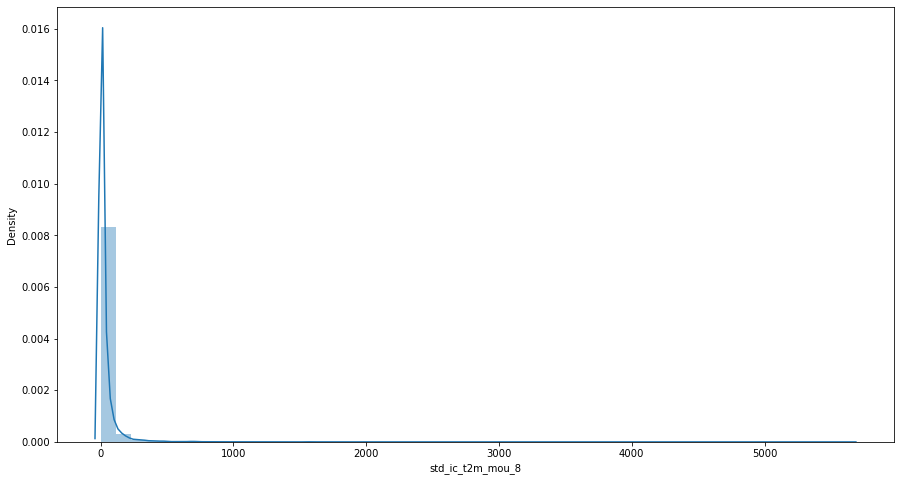

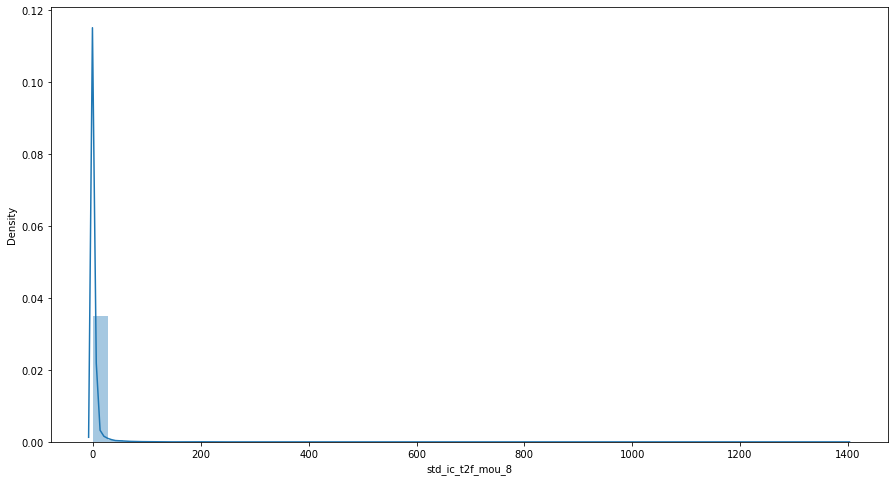

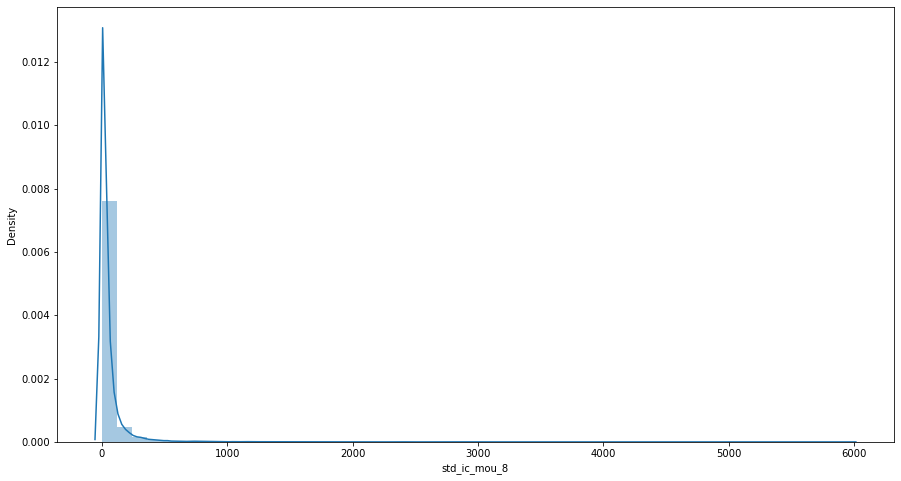

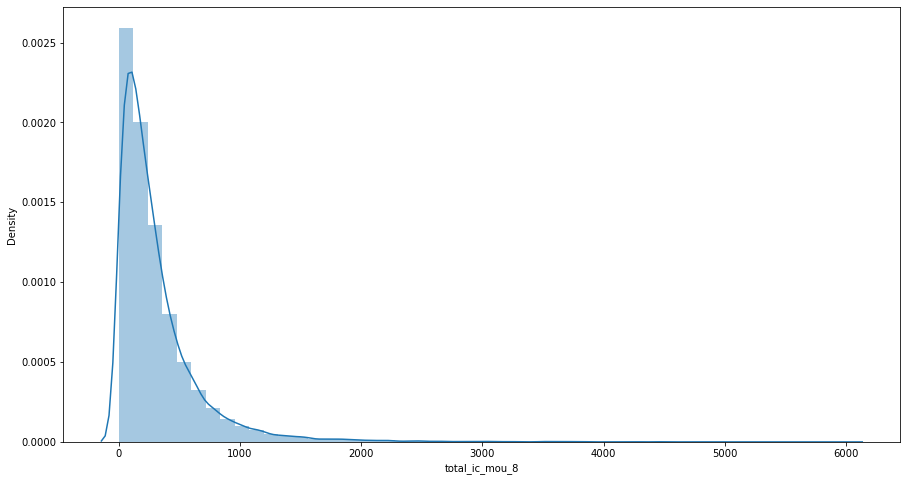

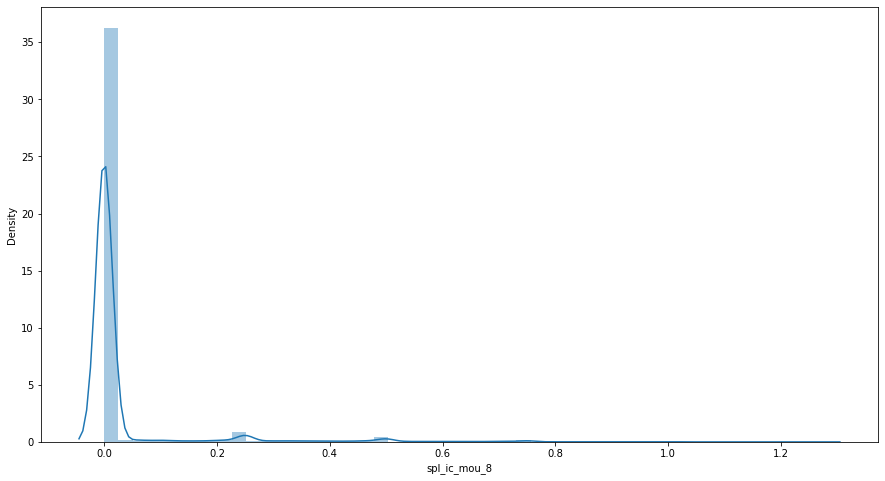

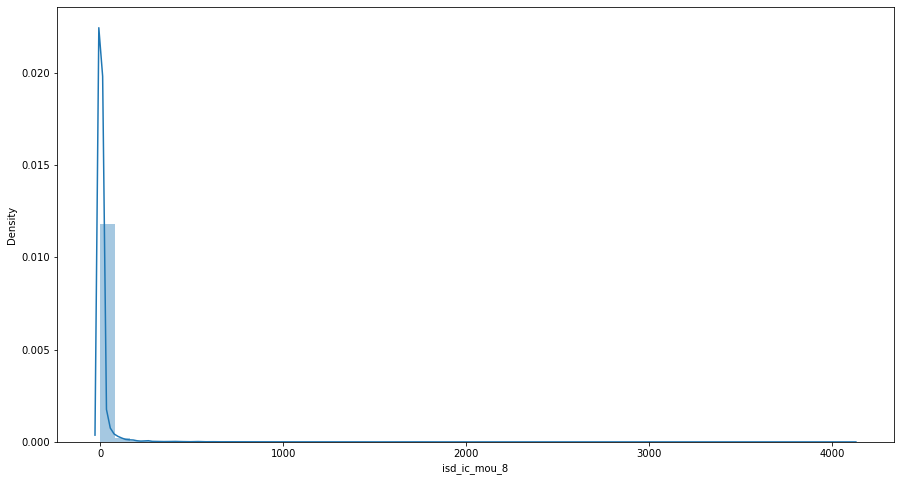

In [89]:
for col in col_action_mou:
    plt.figure(figsize=(15,8))
    sns.distplot(df_action[col])
    plt.show()

In [95]:
col_action_mou

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8']

In [97]:
df_action[col_action_mou].describe()

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8
count,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000
mean,283.256279,395.171105,13.888927,22.386487,92.932317,177.564086,6.801796,1.792893,277.307044,181.651745,188.579997,1.864191,372.100035,2.024049,7.254847,658.746053,70.118935,163.367252,15.549925,249.046149,15.945022,32.089222,2.825070,50.863253,313.415144,0.029463,12.157866
std,474.533256,478.601051,76.982362,109.020893,243.271823,236.801378,20.734697,7.576990,372.490480,417.192066,423.332318,11.986939,623.900409,46.276640,23.664079,684.287175,160.675153,222.158674,44.912421,313.394028,74.986345,107.801465,21.037641,144.859193,366.775591,0.114586,77.221061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.410000,115.380000,0.000000,0.000000,8.180000,29.832500,0.000000,0.000000,49.995000,0.000000,0.710000,0.000000,3.790000,0.000000,0.000000,227.502500,8.960000,37.465000,0.000000,62.190000,0.000000,0.330000,0.000000,2.360000,94.645000,0.000000,0.000000
50%,111.435000,259.860000,0.000000,0.000000,32.735000,100.600000,0.380000,0.000000,165.170000,8.680000,29.360000,0.000000,92.400000,0.000000,0.755000,470.235000,29.910000,98.625000,2.290000,156.525000,0.860000,6.710000,0.000000,14.210000,208.720000,0.000000,0.000000
75%,322.720000,503.390000,0.000000,0.000000,91.030000,235.955000,5.140000,0.137500,366.630000,151.727500,181.525000,0.000000,517.025000,0.000000,6.907500,866.410000,75.287500,207.940000,12.660000,319.947500,9.790000,27.410000,0.280000,46.320000,398.740000,0.000000,0.000000
max,10752.560000,14007.340000,4169.810000,5337.040000,10752.560000,4961.330000,928.490000,351.830000,11039.910000,8014.430000,13950.040000,516.910000,13980.060000,5681.540000,1390.880000,14043.060000,4003.210000,5738.460000,1588.530000,5748.810000,4309.290000,5645.860000,1394.890000,5957.140000,5990.710000,1.260000,4100.380000


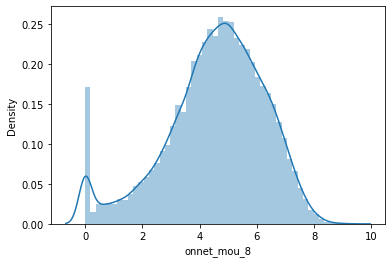

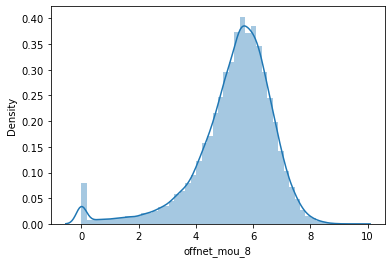

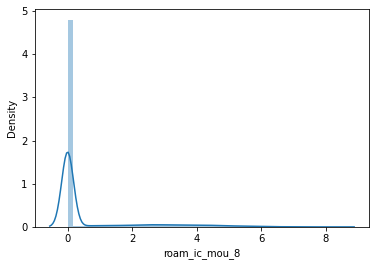

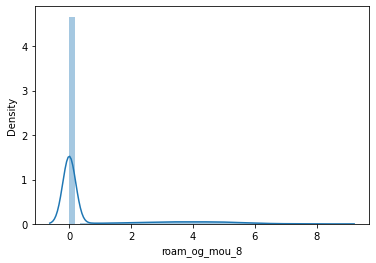

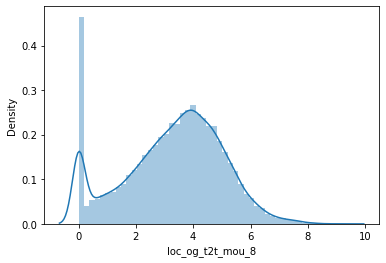

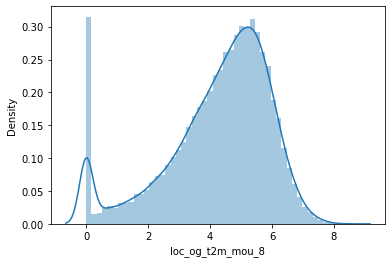

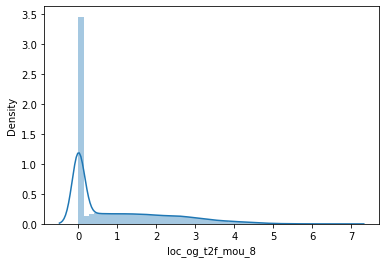

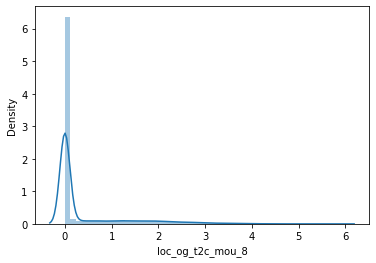

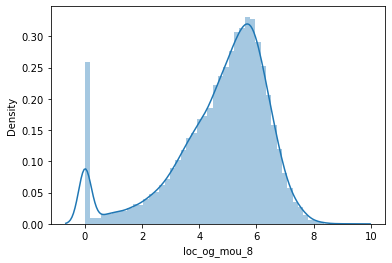

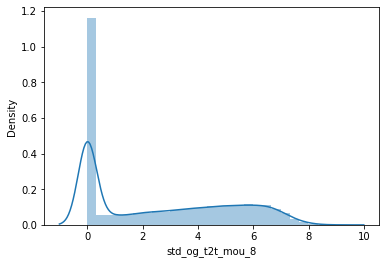

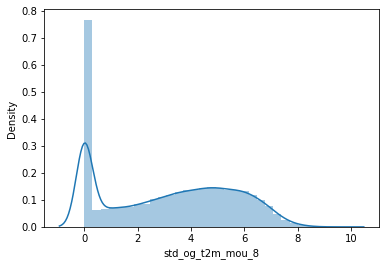

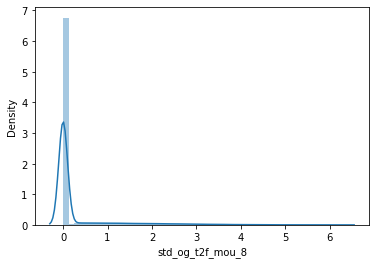

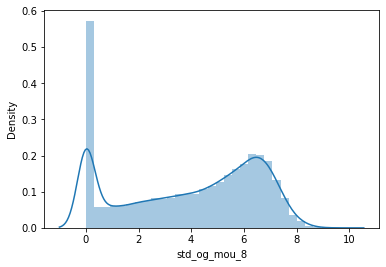

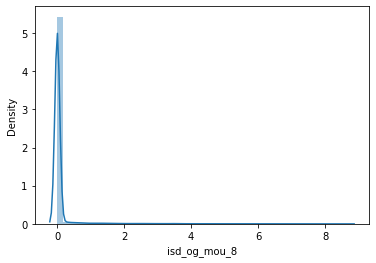

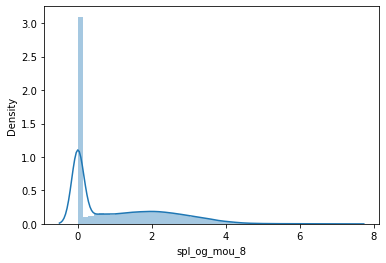

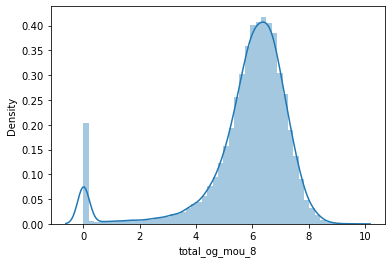

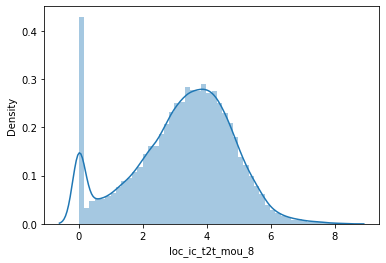

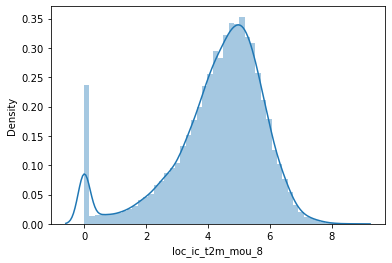

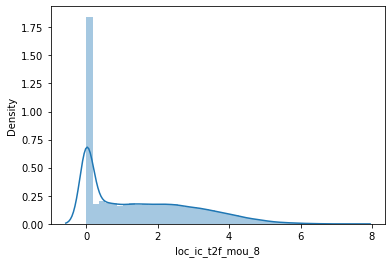

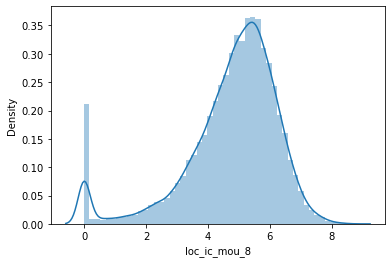

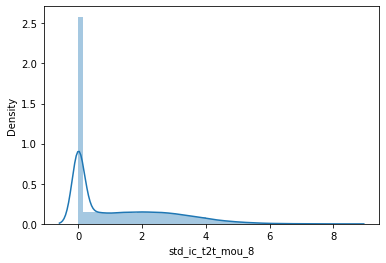

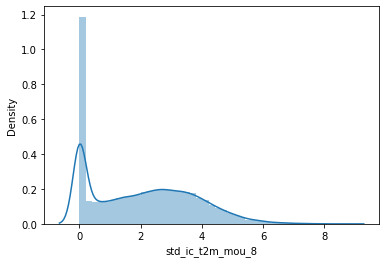

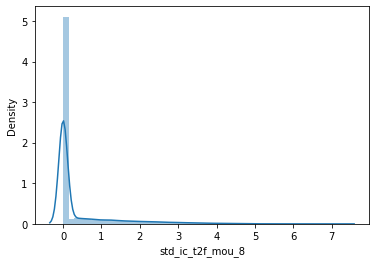

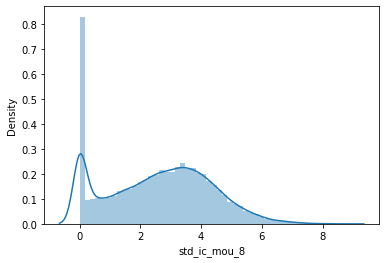

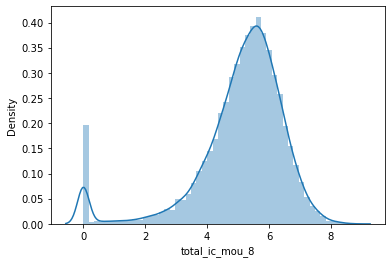

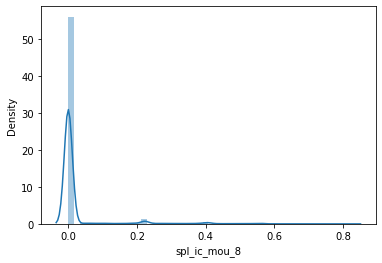

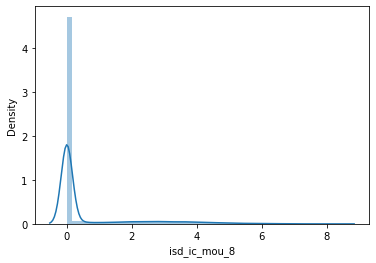

<Figure size 432x288 with 0 Axes>

In [100]:
# Using log transformation on skewed data
df_action_log = pd.DataFrame()
for col in col_action_mou:
    df_action_log[col] = np.log(df_action[col]+1)
    sns.distplot(df_action_log[col])
    fig = plt.figure()